In [5]:
import numpy as np
import pandas as pd
from datetime import datetime

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns  # Import seaborn for advanced visualizations
sns.set(style="whitegrid")  # Set the seaborn style
from pylab import rcParams
from sklearn import metrics  # Model performance metrics
%matplotlib inline

# Statistics
from statsmodels.distributions.empirical_distribution import ECDF

# Time series analysis
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import warnings
warnings.filterwarnings("ignore")


In [6]:
pip install statsmodels


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
df = pd.read_csv('Rose.csv')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   YearMonth  187 non-null    object 
 1   Rose       185 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.1+ KB


In [9]:
df.shape

(187, 2)

In [10]:
df.head()

,YearMonth,Rose
0,1980-01,112.0
1,1980-02,118.0
2,1980-03,129.0
3,1980-04,99.0
4,1980-05,116.0


In [11]:
df.tail(5)

,YearMonth,Rose
182,1995-03,45.0
183,1995-04,52.0
184,1995-05,28.0
185,1995-06,40.0
186,1995-07,62.0


# Read the data as an appropriate Time Series data and plot the data.

In [12]:
Time_Stamp= pd.date_range(start='1/1/1980',end='8/1/1995',freq='M')
Time_Stamp

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1994-10-31', '1994-11-30', '1994-12-31', '1995-01-31',
               '1995-02-28', '1995-03-31', '1995-04-30', '1995-05-31',
               '1995-06-30', '1995-07-31'],
              dtype='datetime64[ns]', length=187, freq='M')

In [13]:
len(Time_Stamp)

187

In [14]:
df['Time_Stamp']=Time_Stamp
df

,YearMonth,Rose,Time_Stamp
0,1980-01,112.0,1980-01-31
1,1980-02,118.0,1980-02-29
2,1980-03,129.0,1980-03-31
3,1980-04,99.0,1980-04-30
4,1980-05,116.0,1980-05-31
...,...,...,...
182,1995-03,45.0,1995-03-31
183,1995-04,52.0,1995-04-30
184,1995-05,28.0,1995-05-31
185,1995-06,40.0,1995-06-30


In [15]:
#df.set_index(keys='Time_Stamp', inplace=True)
df.drop(['YearMonth'], axis=1, inplace=True)
df.head()

,Rose,Time_Stamp
0,112.0,1980-01-31
1,118.0,1980-02-29
2,129.0,1980-03-31
3,99.0,1980-04-30
4,116.0,1980-05-31


In [16]:
df.tail()

,Rose,Time_Stamp
182,45.0,1995-03-31
183,52.0,1995-04-30
184,28.0,1995-05-31
185,40.0,1995-06-30
186,62.0,1995-07-31


# Renaming the column

In [17]:
df.rename(columns={'Rose':'Rose_Wine_Sales'}, inplace=True)
df.head()

,Rose_Wine_Sales,Time_Stamp
0,112.0,1980-01-31
1,118.0,1980-02-29
2,129.0,1980-03-31
3,99.0,1980-04-30
4,116.0,1980-05-31


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Rose_Wine_Sales  185 non-null    float64       
 1   Time_Stamp       187 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.1 KB


# Checking for missing values

In [19]:
df.isnull().sum()

Rose_Wine_Sales    2
Time_Stamp         0
dtype: int64

In [20]:
df[df.isnull().values]

,Rose_Wine_Sales,Time_Stamp
174,NaN,1994-07-31
175,NaN,1994-08-31


# Plot the Time Series to understand the behaviour of the data.

Text(0, 0.5, 'Wine Units Sold')

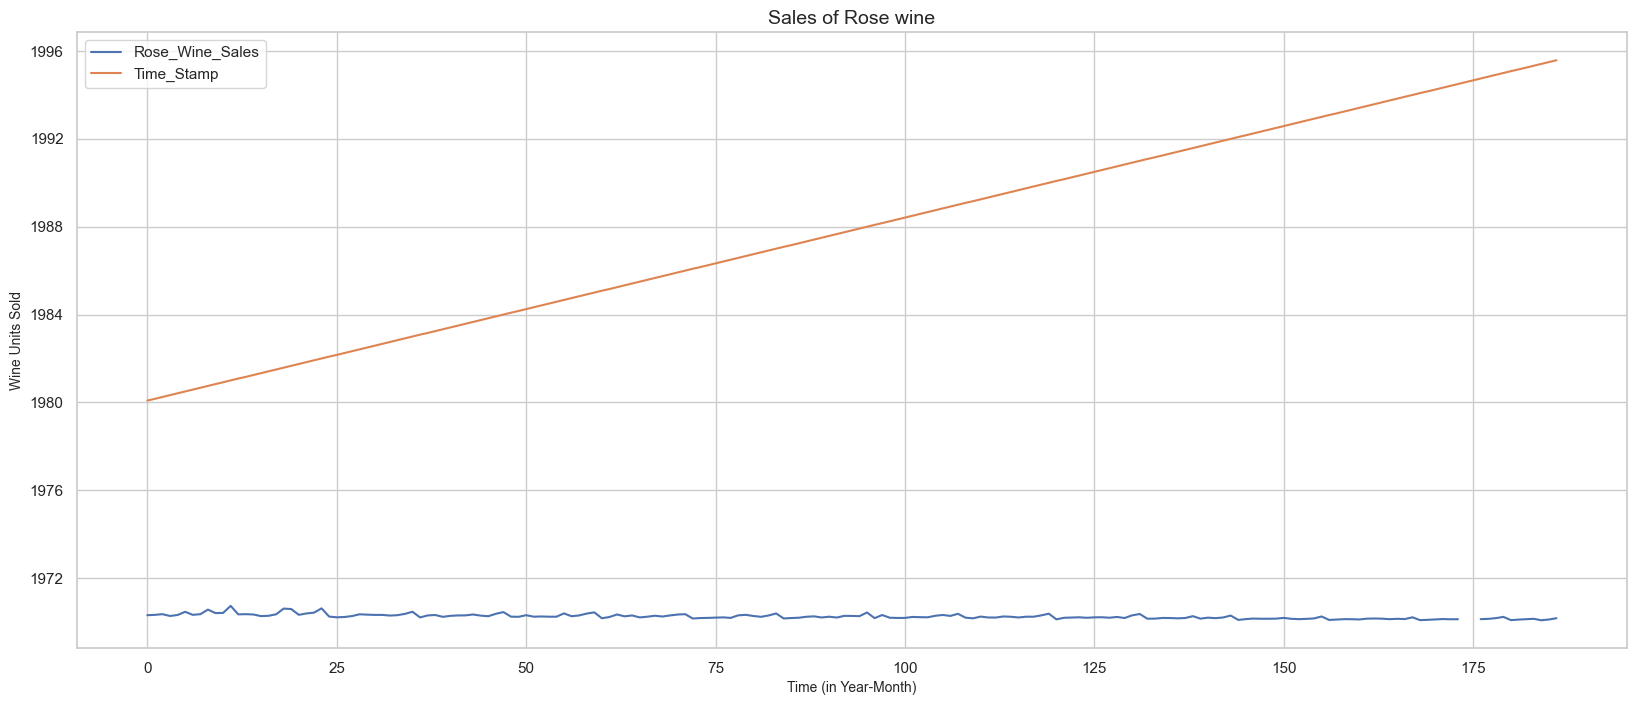

In [21]:
rcParams['figure.figsize'] = (20,8)
df.plot(grid=True);
plt.title('Sales of Rose wine', fontsize=14)
plt.xlabel('Time (in Year-Month)',fontsize=10)
plt.ylabel('Wine Units Sold',fontsize=10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   YearMonth  187 non-null    object 
 1   Rose       185 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.1+ KB
Rose_Wine_Sales    2
dtype: int64


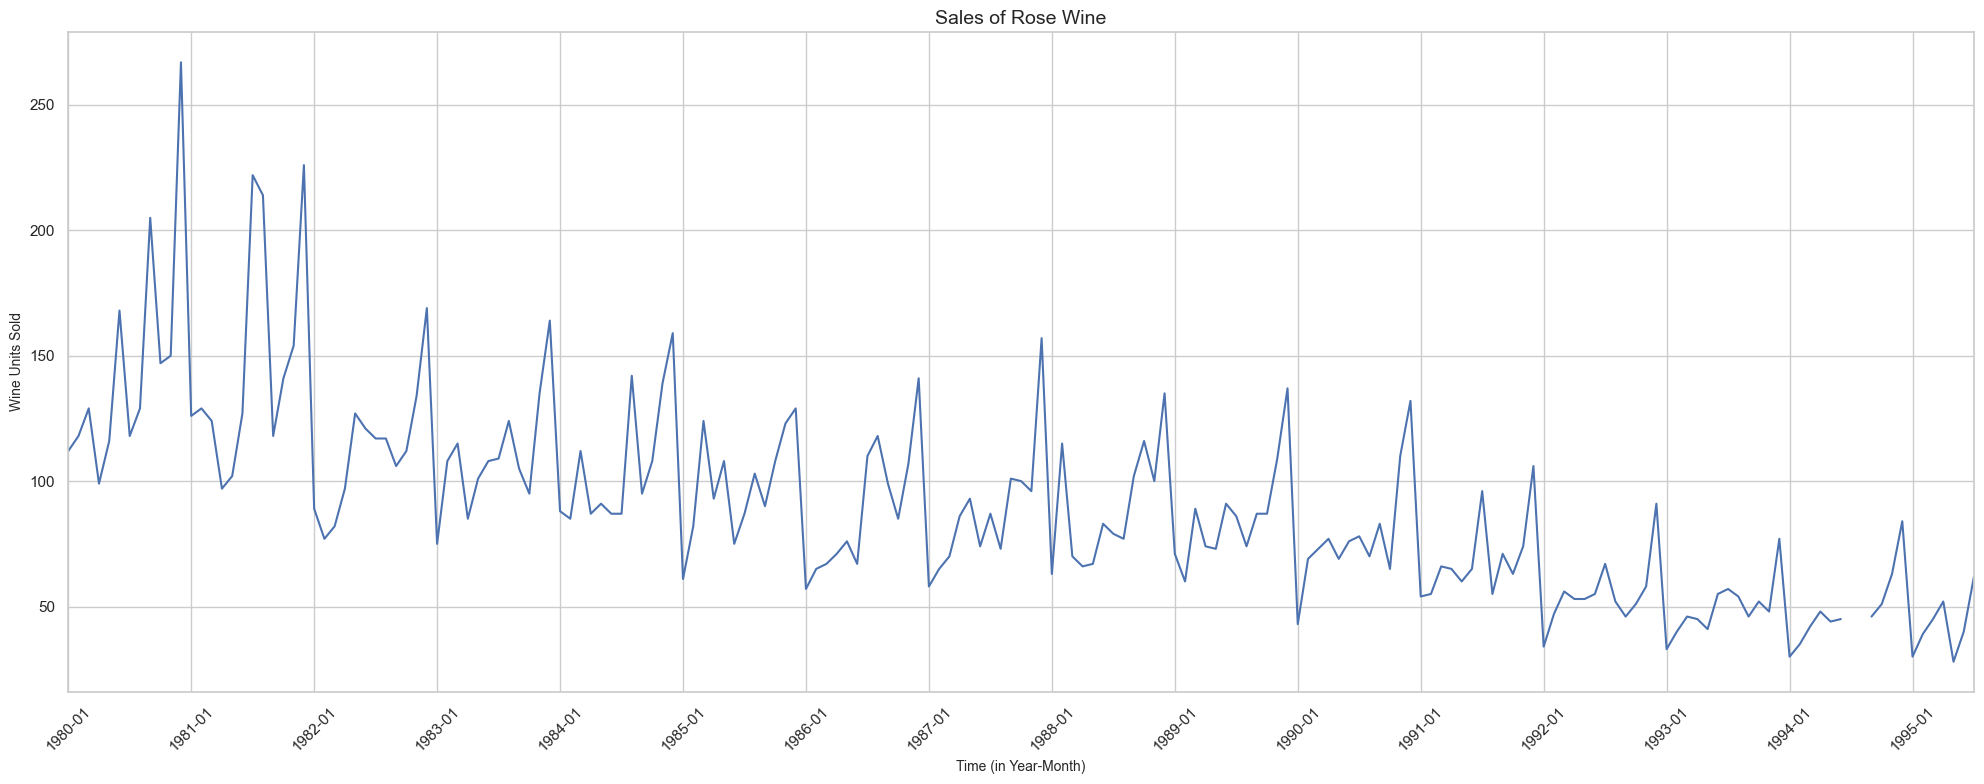

In [22]:
import numpy as np
import pandas as pd
from datetime import datetime

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns  # Import seaborn for advanced visualizations
sns.set(style="whitegrid")  # Set the seaborn style
from pylab import rcParams
from sklearn import metrics  # Model performance metrics
%matplotlib inline

# Statistics
from statsmodels.distributions.empirical_distribution import ECDF

# Time series analysis
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import warnings
warnings.filterwarnings("ignore")

# Assuming the dataset is in the correct working directory
df = pd.read_csv('Rose.csv')
df.info()
df.shape
df.head()
df.tail(5)

# Read the data as an appropriate Time Series data and plot the data.
Time_Stamp = pd.date_range(start='1/1/1980', end='8/1/1995', freq='M')
df['Time_Stamp'] = Time_Stamp

# Dropping unnecessary column
df.drop(['YearMonth'], axis=1, inplace=True)

# Renaming the column
df.rename(columns={'Rose': 'Rose_Wine_Sales'}, inplace=True)

# Setting Time_Stamp as the index
df.set_index('Time_Stamp', inplace=True)

# Checking for missing values
print(df.isnull().sum())

# Plot the Time Series to understand the behaviour of the data.
rcParams['figure.figsize'] = (20, 8)
ax = df['Rose_Wine_Sales'].plot(grid=True)
plt.title('Sales of Rose Wine', fontsize=14)
plt.xlabel('Time (in Year-Month)', fontsize=10)
plt.ylabel('Wine Units Sold', fontsize=10)

# Setting x-ticks to show every 12 months
ax.set_xticks(pd.date_range(start='1/1/1980', end='8/1/1995', freq='12M'))
ax.set_xticklabels(pd.date_range(start='1/1/1980', end='8/1/1995', freq='12M').strftime('%Y-%m'))

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [23]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Handling missing values

In [24]:
df.converted = df.Rose_Wine_Sales
temp = df.converted.resample('D').mean()
df.Rose_Wine_Sales = round(temp.interpolate(methods='linear'),2)
df.Rose_Wine_Sales['1994']

Time_Stamp
1994-01-31    30.00
1994-02-28    35.00
1994-03-31    42.00
1994-04-30    48.00
1994-05-31    44.00
1994-06-30    45.00
1994-07-31    45.34
1994-08-31    45.67
1994-09-30    46.00
1994-10-31    51.00
1994-11-30    63.00
1994-12-31    84.00
Name: Rose_Wine_Sales, dtype: float64

 The missing values for the months of July and August have been imputed with linear interpolation

In [25]:
df.isnull().sum()

Rose_Wine_Sales    0
dtype: int64

# Check the basic measures of descriptive statistics

In [26]:
df.describe()


,Rose_Wine_Sales
count,187.000000
mean,89.914492
std,39.238264
min,28.000000
25%,62.500000
50%,85.000000
75%,111.000000
max,267.000000


 The average sales of Rose wine is around 90 units
 The minimuim quantity of sales recorded is 28 and the max is 267 units
 Around 50% of the sales recorded in a month are around 85 units
 Only 25% of the sales recorded in a month are above 111 units

# Plot a boxplot to understand the spread of sales across different years and within different months across years.

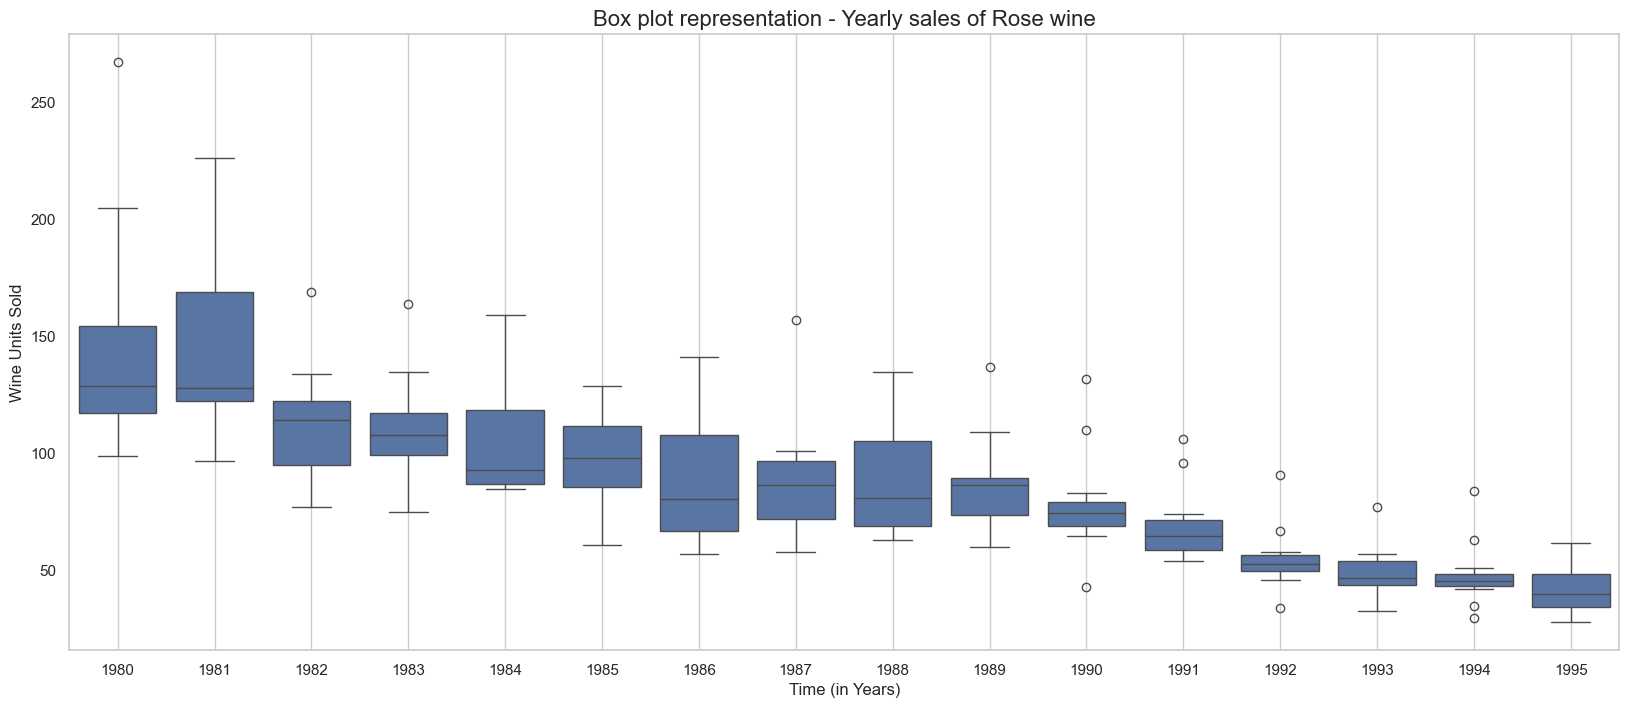

In [27]:
_, ax = plt.subplots(figsize=(20,8))
sns.boxplot(x = df.index.year,y = df.values[:,0],ax=ax)
plt.title('Box plot representation - Yearly sales of Rose wine', fontsize=16)
plt.xlabel('Time (in Years)')
plt.ylabel('Wine Units Sold')
plt.grid();

 The sales of rose wine have gradually declined over the years
At the initial years, the sales were high with maximum sales happening in 1981.

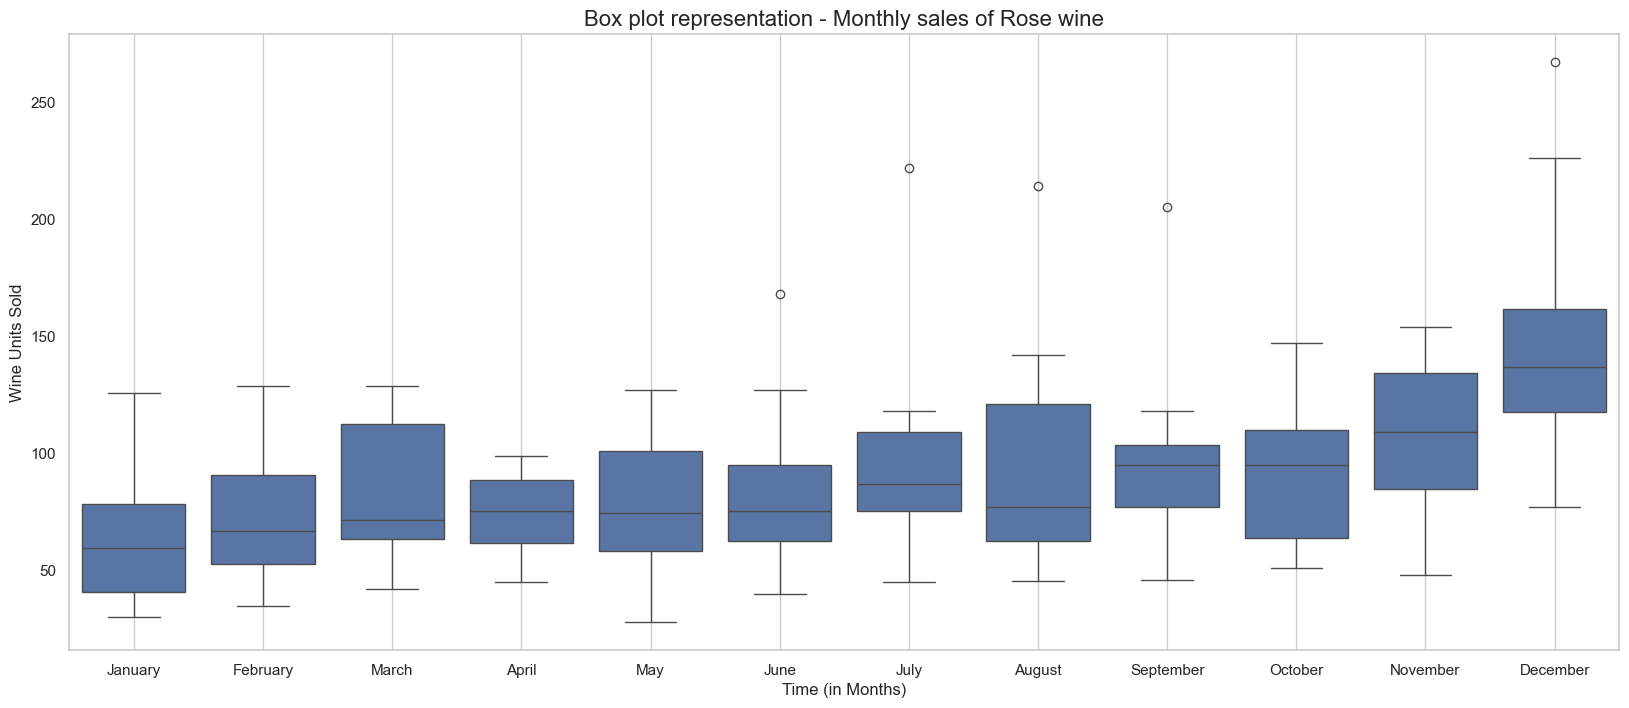

In [28]:
_, ax = plt.subplots(figsize=(20,8))
sns.boxplot(x = df.index.month_name(),y = df.values[:,0],ax=ax)
plt.title('Box plot representation - Monthly sales of Rose wine', fontsize=16)
plt.xlabel('Time (in Months)')
plt.ylabel('Wine Units Sold')
plt.grid();

December month records the highest average sales
The sales seems to usually pick in the last 4 months
Average order is greater in december and lowest in january

# Plot the empirical cumulative Distribution function

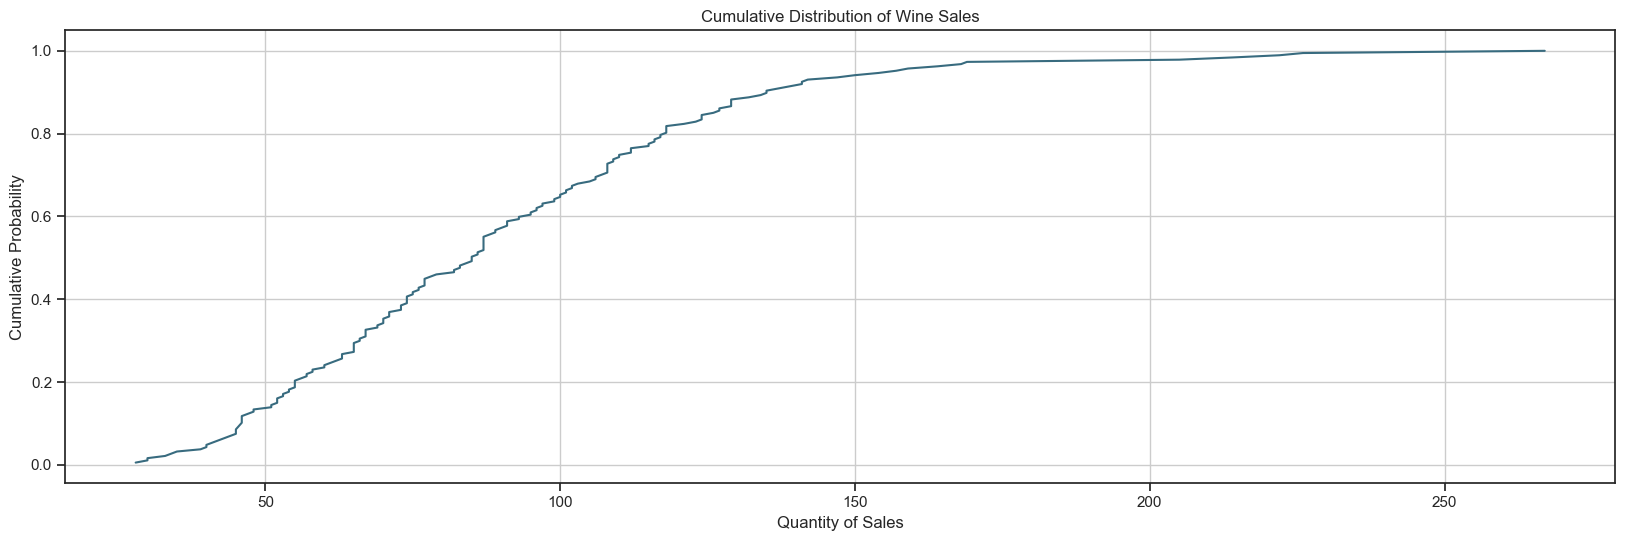

In [29]:
sns.set(style = "ticks")# to format into seaborn 
c = '#386B7F' # basic color for plots
plt.figure(figsize = (20, 20))


plt.subplot(312)
cdf = ECDF(df['Rose_Wine_Sales'])
plt.plot(cdf.x, cdf.y, label = "statmodels", color = c)
plt.title('Cumulative Distribution of Wine Sales')
plt.xlabel('Quantity of Sales');
plt.ylabel('Cumulative Probability')
plt.grid(True)
plt.show()

Around 70 to 90% of the orders are within 100 to 150 units.

# Monthly sales across years.

In [30]:
monthly_sales_across_years = pd.pivot_table(df, values = 'Rose_Wine_Sales', columns = df.index.month_name(), index = df.index.year)
monthly_sales_across_years

Time_Stamp,April,August,December,February,January,July,June,March,May,November,October,September
Time_Stamp,,,,,,,,,,,,
1980,99.0,129.00,267.0,118.0,112.0,118.00,168.0,129.0,116.0,150.0,147.0,205.0
1981,97.0,214.00,226.0,129.0,126.0,222.00,127.0,124.0,102.0,154.0,141.0,118.0
1982,97.0,117.00,169.0,77.0,89.0,117.00,121.0,82.0,127.0,134.0,112.0,106.0
1983,85.0,124.00,164.0,108.0,75.0,109.00,108.0,115.0,101.0,135.0,95.0,105.0
1984,87.0,142.00,159.0,85.0,88.0,87.00,87.0,112.0,91.0,139.0,108.0,95.0
1985,93.0,103.00,129.0,82.0,61.0,87.00,75.0,124.0,108.0,123.0,108.0,90.0
1986,71.0,118.00,141.0,65.0,57.0,110.00,67.0,67.0,76.0,107.0,85.0,99.0
1987,86.0,73.00,157.0,65.0,58.0,87.00,74.0,70.0,93.0,96.0,100.0,101.0
1988,66.0,77.00,135.0,115.0,63.0,79.00,83.0,70.0,67.0,100.0,116.0,102.0


Text(0, 0.5, 'Wine Units Sold')

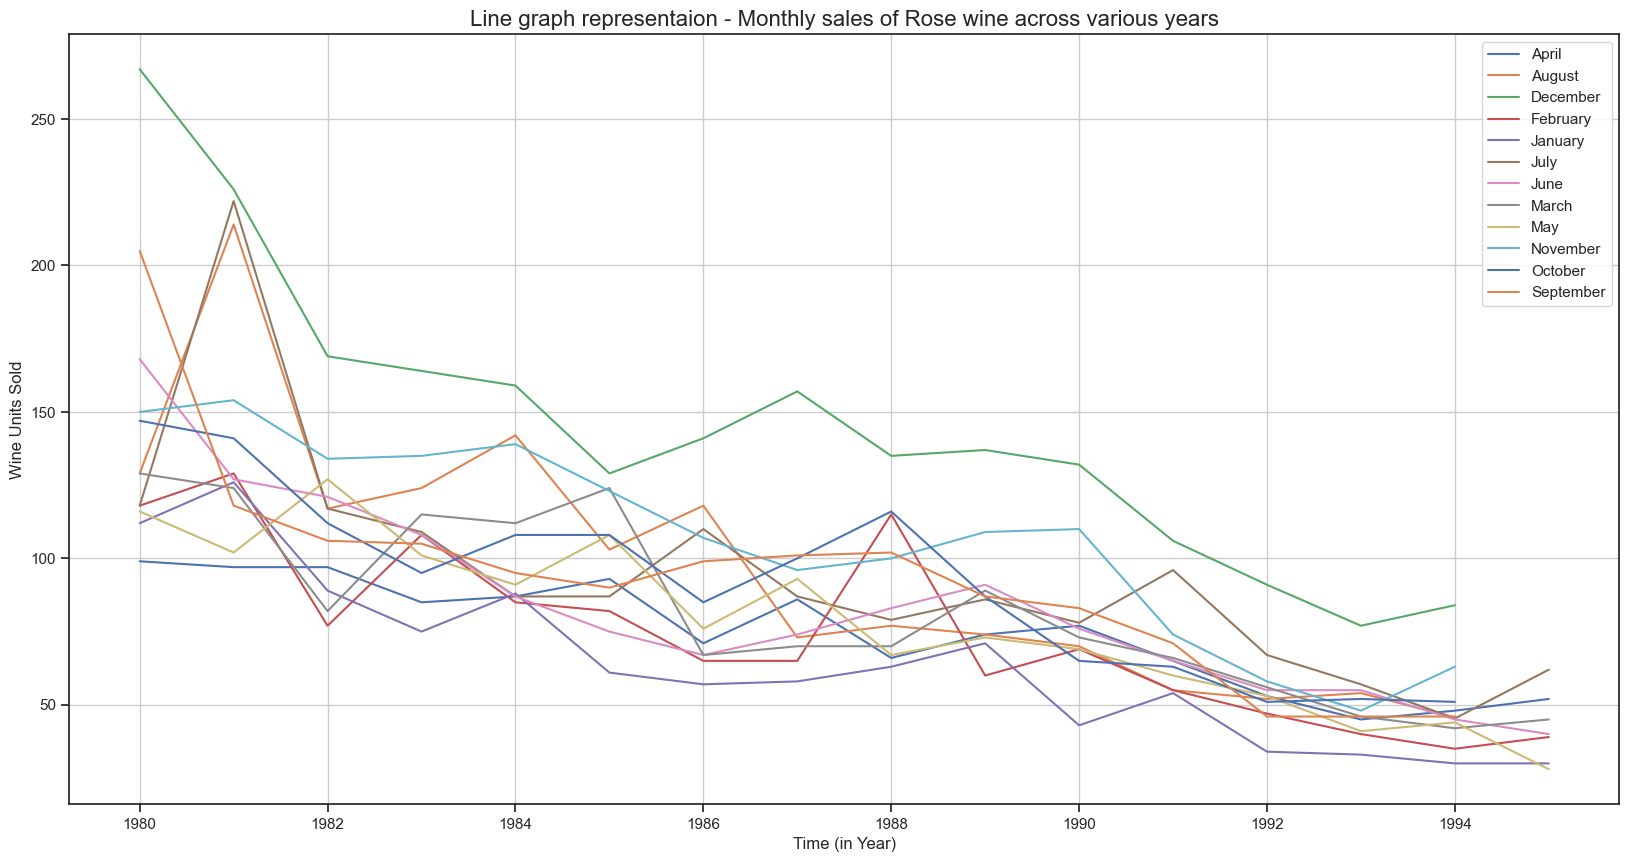

In [31]:
monthly_sales_across_years.plot(figsize=(20,10))
plt.grid();
plt.title('Line graph representaion - Monthly sales of Rose wine across various years', fontsize=16)
plt.legend(loc='best');
plt.xlabel('Time (in Year)')
plt.ylabel('Wine Units Sold')

December performed the best in terms of overall and average sales

# Resampling monthly data into a quarterly and yearly format

Yearly plot

In [32]:
df_yearly_sum = df.resample('A').sum()
df_yearly_sum

,Rose_Wine_Sales
Time_Stamp,
1980-12-31,1758.00
1981-12-31,1780.00
1982-12-31,1348.00
1983-12-31,1324.00
1984-12-31,1280.00
1985-12-31,1183.00
1986-12-31,1063.00
1987-12-31,1060.00
1988-12-31,1073.00


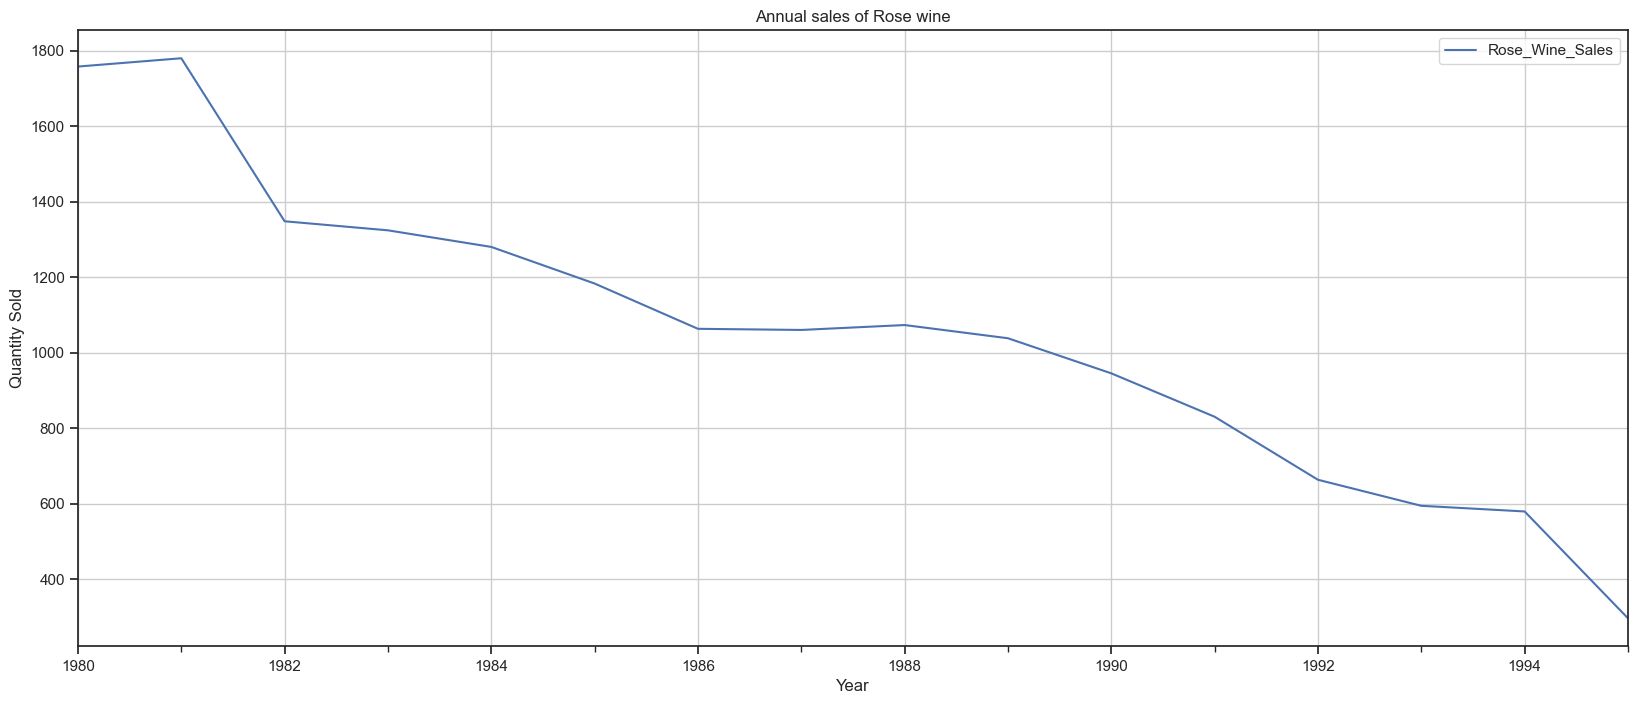

In [33]:
df_yearly_sum.plot();
plt.grid()
plt.title('Annual sales of Rose wine');
plt.xlabel('Year')
plt.ylabel('Quantity Sold');

Quarterly Plot

In [34]:
df_quarterly_sum = df.resample('Q').sum()
df_quarterly_sum.head(10)

,Rose_Wine_Sales
Time_Stamp,
1980-03-31,359.0
1980-06-30,383.0
1980-09-30,452.0
1980-12-31,564.0
1981-03-31,379.0
1981-06-30,326.0
1981-09-30,554.0
1981-12-31,521.0
1982-03-31,248.0


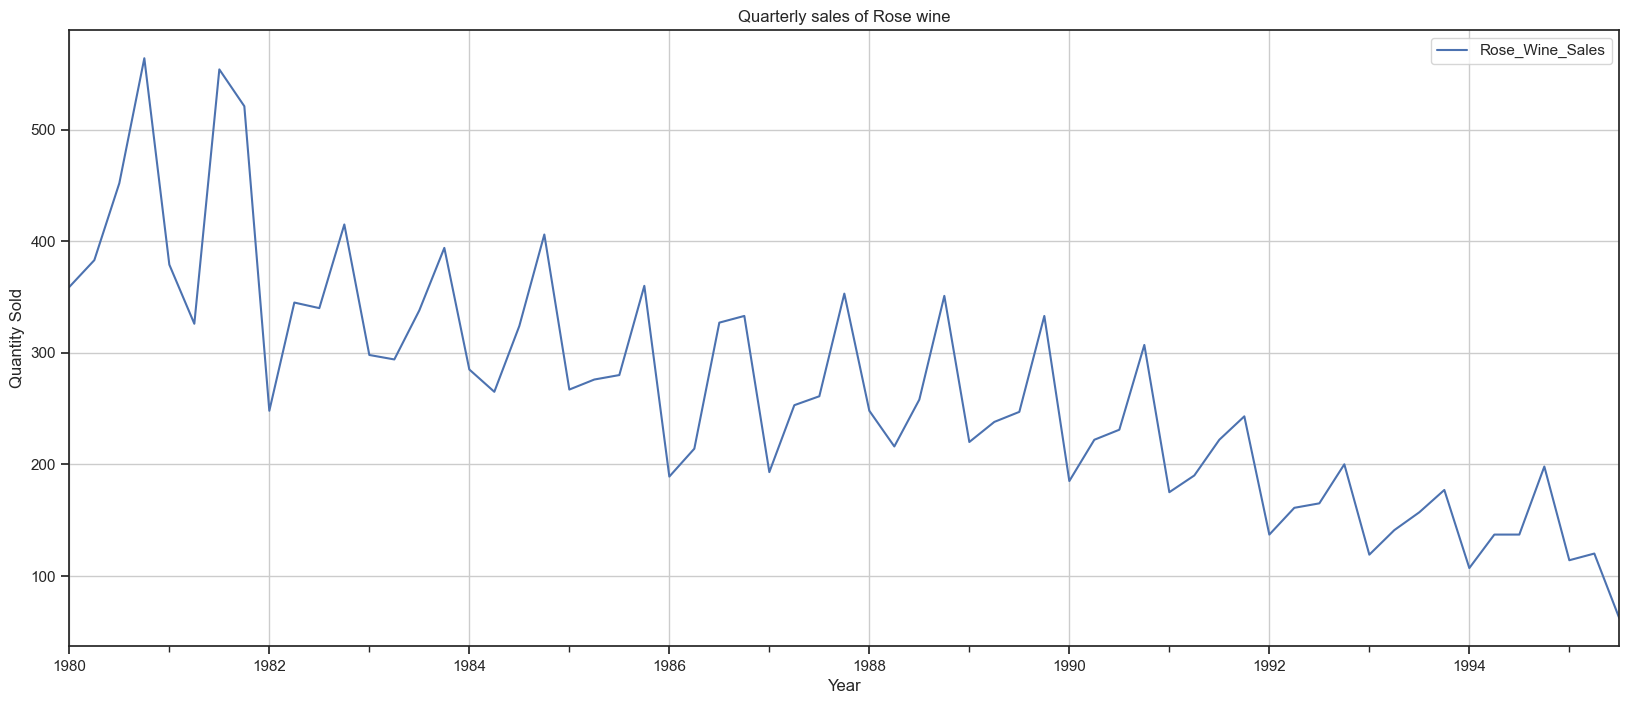

In [35]:
df_quarterly_sum.plot();
plt.grid()
plt.title('Quarterly sales of Rose wine');
plt.xlabel('Year')
plt.ylabel('Quantity Sold');

The sales are incresingly high in Q3 and Q4

# Decomposition of the Time Series

Additive decomposition

<Figure size 2000x800 with 0 Axes>

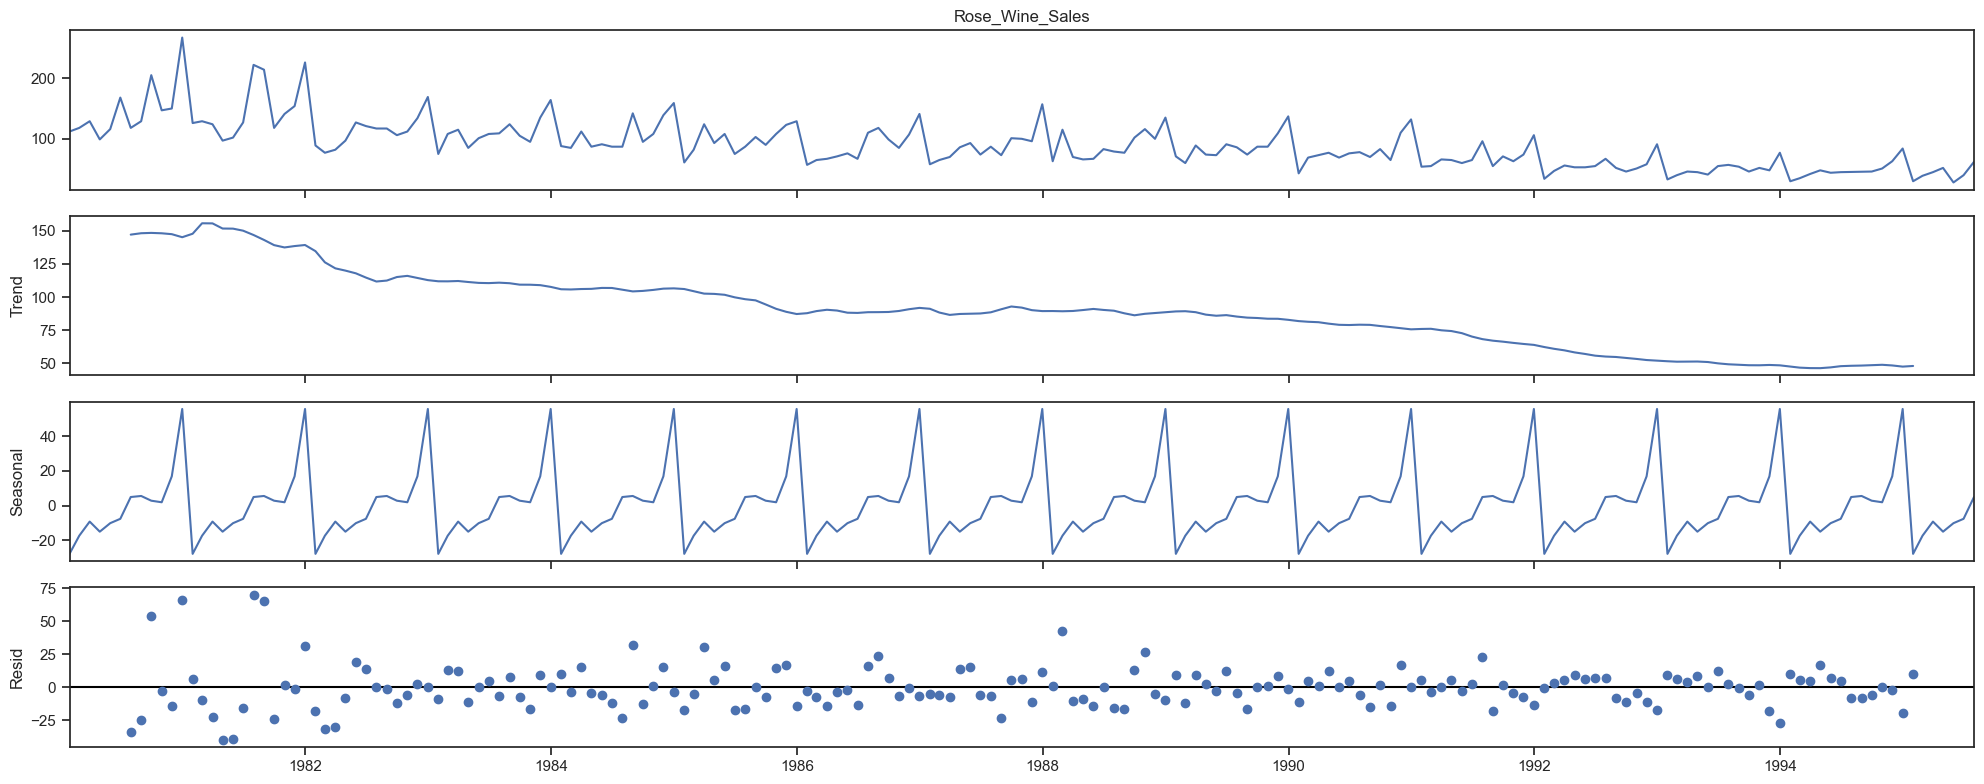

In [36]:
plt.figure(figsize=(20,8))
decomposition = seasonal_decompose(df['Rose_Wine_Sales'],model='additive')
decomposition.plot();
plt.show()

In [37]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Time_Stamp
1980-01-31           NaN
1980-02-29           NaN
1980-03-31           NaN
1980-04-30           NaN
1980-05-31           NaN
1980-06-30           NaN
1980-07-31    147.083333
1980-08-31    148.125000
1980-09-30    148.375000
1980-10-31    148.083333
1980-11-30    147.416667
1980-12-31    145.125000
Name: trend, dtype: float64 

Seasonality 
 Time_Stamp
1980-01-31   -27.908702
1980-02-29   -17.435680
1980-03-31    -9.285889
1980-04-30   -15.098389
1980-05-31   -10.196603
1980-06-30    -7.678746
1980-07-31     4.897298
1980-08-31     5.499853
1980-09-30     2.774631
1980-10-31     1.871853
1980-11-30    16.846853
1980-12-31    55.713520
Name: seasonal, dtype: float64 

Residual 
 Time_Stamp
1980-01-31          NaN
1980-02-29          NaN
1980-03-31          NaN
1980-04-30          NaN
1980-05-31          NaN
1980-06-30          NaN
1980-07-31   -33.980631
1980-08-31   -24.624853
1980-09-30    53.850369
1980-10-31    -2.955187
1980-11-30   -14.263520
1980-12-31    66.16

Multiplicative Decomposition

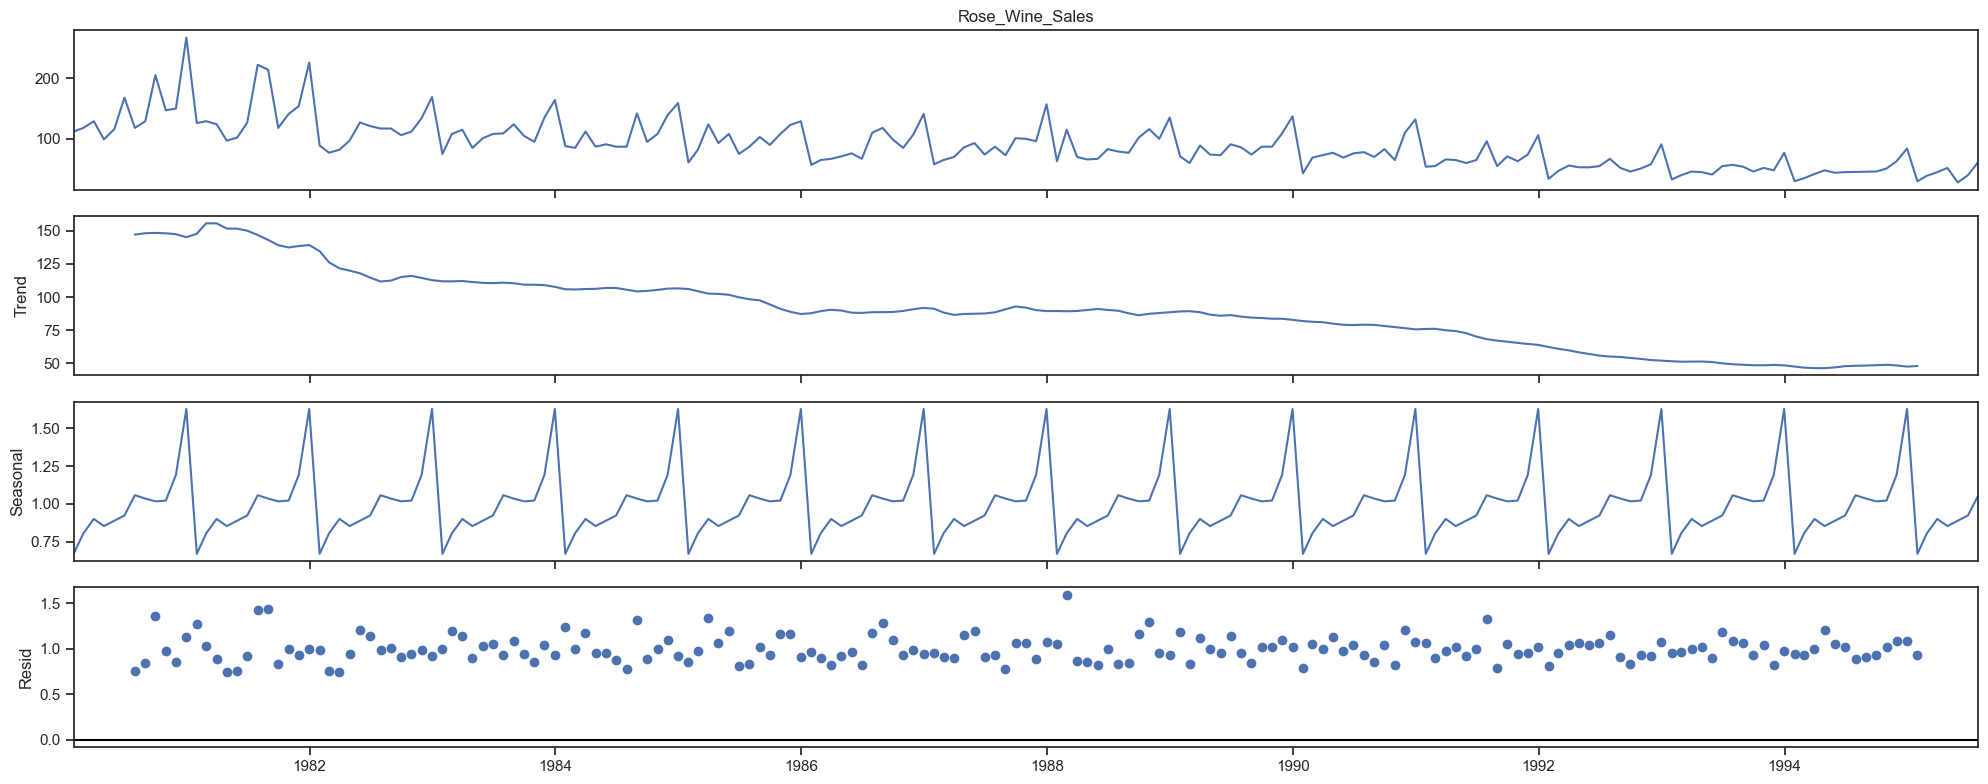

In [38]:
decomposition = seasonal_decompose(df['Rose_Wine_Sales'],model='multiplicative')
decomposition.plot();

In [39]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Time_Stamp
1980-01-31           NaN
1980-02-29           NaN
1980-03-31           NaN
1980-04-30           NaN
1980-05-31           NaN
1980-06-30           NaN
1980-07-31    147.083333
1980-08-31    148.125000
1980-09-30    148.375000
1980-10-31    148.083333
1980-11-30    147.416667
1980-12-31    145.125000
Name: trend, dtype: float64 

Seasonality 
 Time_Stamp
1980-01-31    0.670111
1980-02-29    0.806163
1980-03-31    0.901163
1980-04-30    0.854023
1980-05-31    0.889414
1980-06-30    0.923984
1980-07-31    1.058046
1980-08-31    1.035885
1980-09-30    1.017647
1980-10-31    1.022572
1980-11-30    1.192347
1980-12-31    1.628644
Name: seasonal, dtype: float64 

Residual 
 Time_Stamp
1980-01-31         NaN
1980-02-29         NaN
1980-03-31         NaN
1980-04-30         NaN
1980-05-31         NaN
1980-06-30         NaN
1980-07-31    0.758253
1980-08-31    0.840717
1980-09-30    1.357675
1980-10-31    0.970772
1980-11-30    0.853379
1980-12-31    1.129647
Name: resid, dtype:

#  Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment. Note: Stationarity should be checked at alpha = 0.05.

The Augmented Dickey-Fuller test is an unit root test which determines whether there is a unit root and subsequently whether the series is non-stationary.

The hypothesis in a simple form for the ADF test is:

 : The Time Series has a unit root and is thus non-stationary.
 : The Time Series does not have a unit root and is thus stationary.
We would want the series to be stationary for building ARIMA models and thus we would want the p-value of this test to be less than the 
 value.

In [40]:
from statsmodels.tsa.stattools import adfuller

In [41]:
print('Results of Dicky-Fuller Test')
dftest = adfuller(df,regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

Results of Dicky-Fuller Test
DF test statistic is -2.240
DF test p-value is 0.46713505298058877
Number of lags used 13


We see that at 5% significant level the Time Series is non-stationary.Let us take one level of differencing to see whether the series becomes stationary.

In [42]:
print('Results of Dicky-Fuller Test with differencing')
dftest = adfuller(df.diff().dropna(),regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

Results of Dicky-Fuller Test with differencing
DF test statistic is -8.162
DF test p-value is 3.0158926765621854e-11
Number of lags used 12


In [43]:
dftest

(-8.16206535399178,
 3.0158926765621854e-11,
 12,
 173,
 {'1%': -4.012075815845091,
  '5%': -3.4361787125348875,
  '10%': -3.1421311308149904},
 1509.060464179057)

Now, let us go ahead and plot the stationary series.

Text(0.5, 0, 'Time (in Year-Month)')

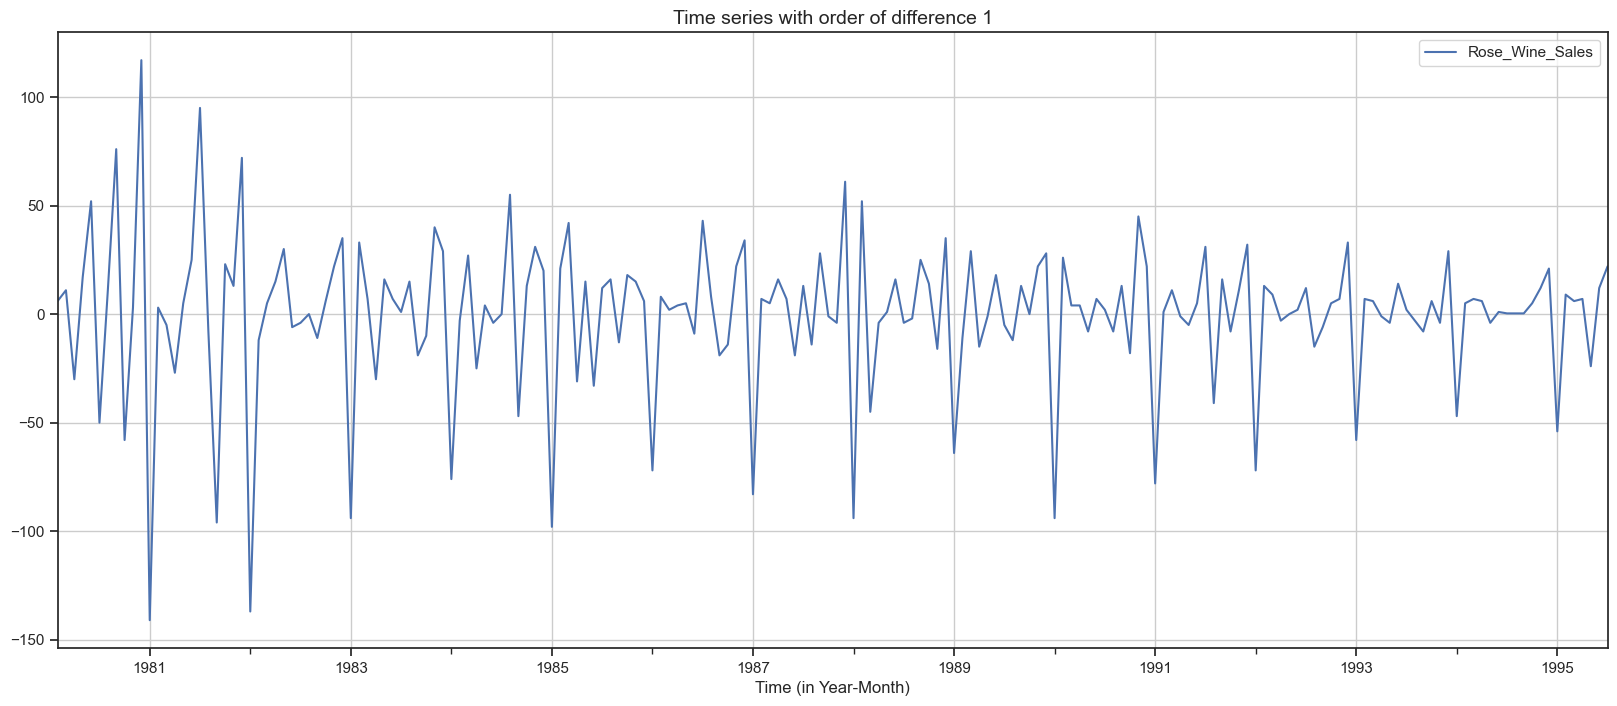

In [44]:
df.diff().dropna().plot(grid=True);
plt.title('Time series with order of difference 1', fontsize=14)
plt.xlabel('Time (in Year-Month)')

# Plot the Autocorrelation and the Partial Autocorrelation function plots on the whole data.

ACF plot

Text(0, 0.5, 'Correlation')

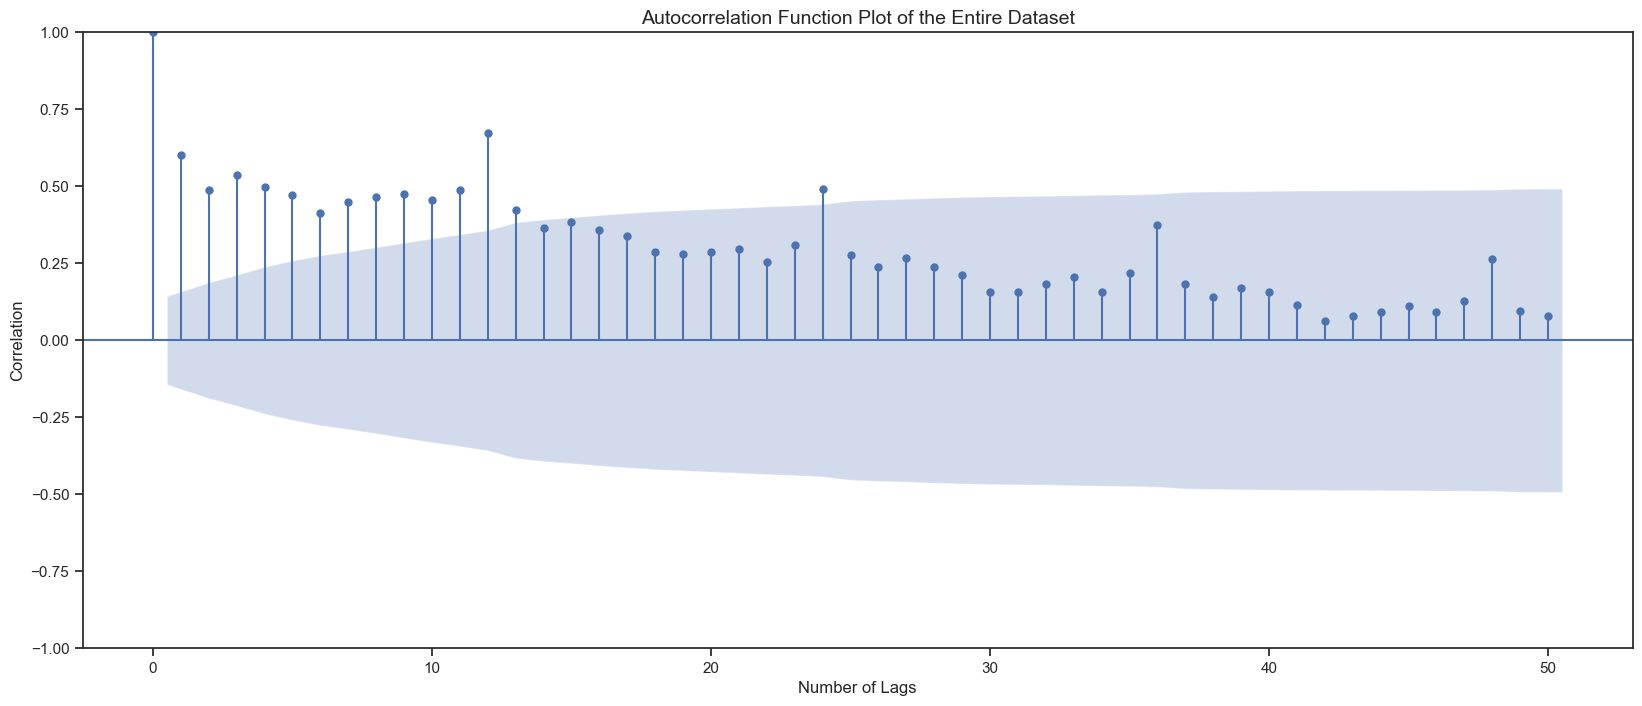

In [45]:
plot_acf(df,alpha=0.05,lags=50);
plt.title('Autocorrelation Function Plot of the Entire Dataset', fontsize=14)
plt.xlabel('Number of Lags')
plt.ylabel('Correlation')

Text(0, 0.5, 'Correlation')

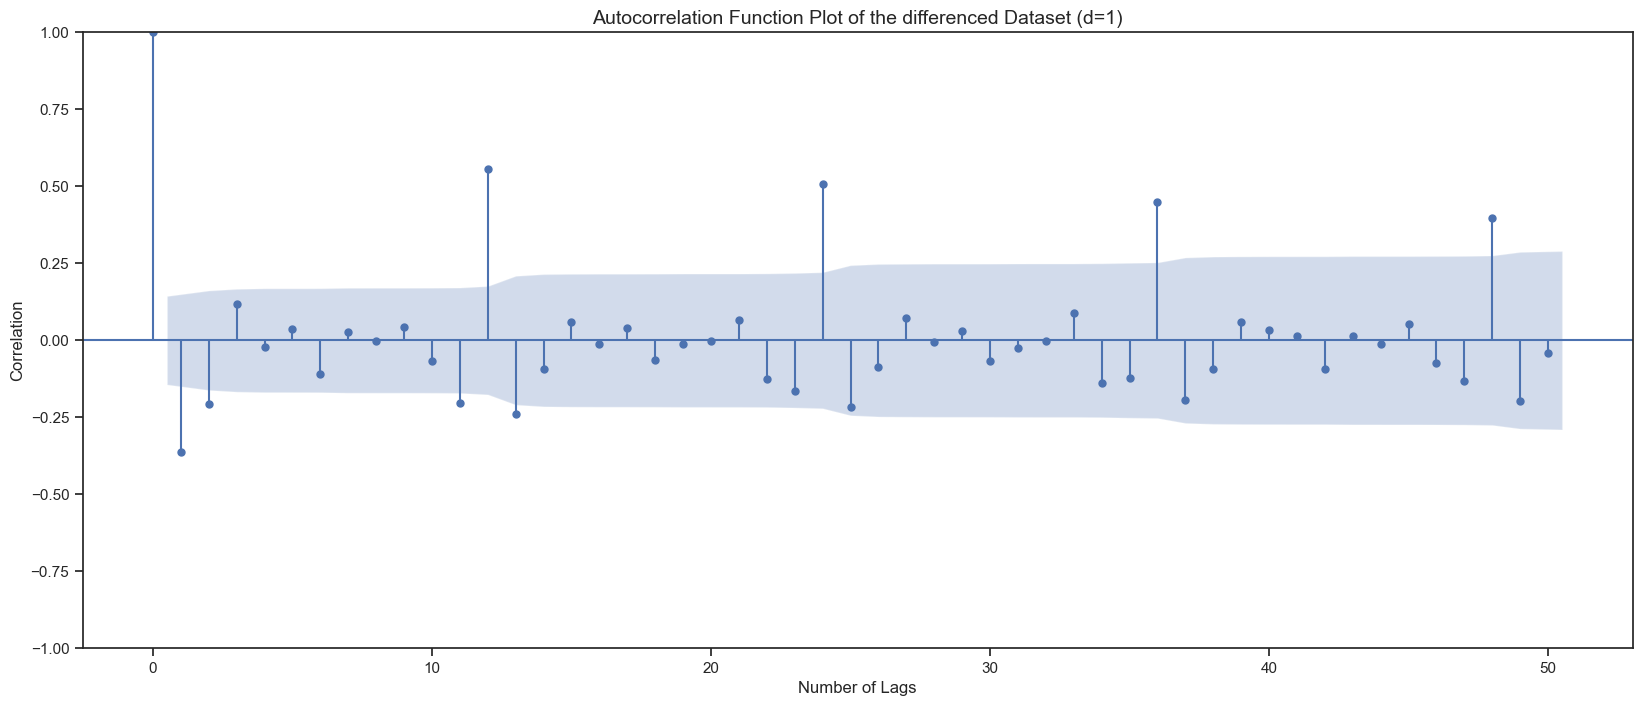

In [46]:
plot_acf(df.diff().dropna(),alpha=0.05,lags=50);
plt.title('Autocorrelation Function Plot of the differenced Dataset (d=1)', fontsize=14)
plt.xlabel('Number of Lags')
plt.ylabel('Correlation')

PACF plot

Text(0, 0.5, 'Correlation')

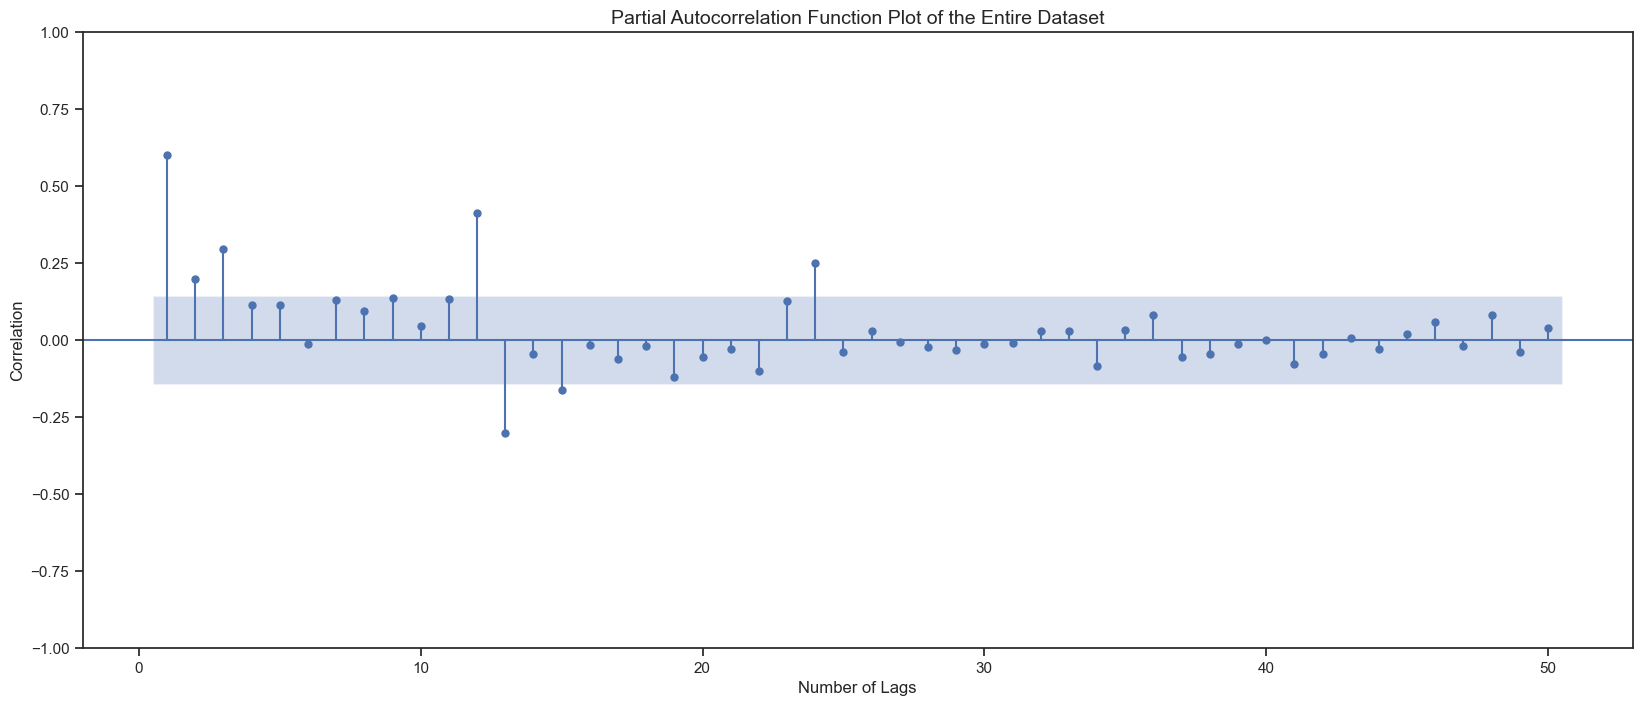

In [47]:
plot_pacf(df,zero=False,alpha=0.05,lags=50);
plt.title('Partial Autocorrelation Function Plot of the Entire Dataset', fontsize=14)
plt.xlabel('Number of Lags')
plt.ylabel('Correlation')

Text(0, 0.5, 'Correlation')

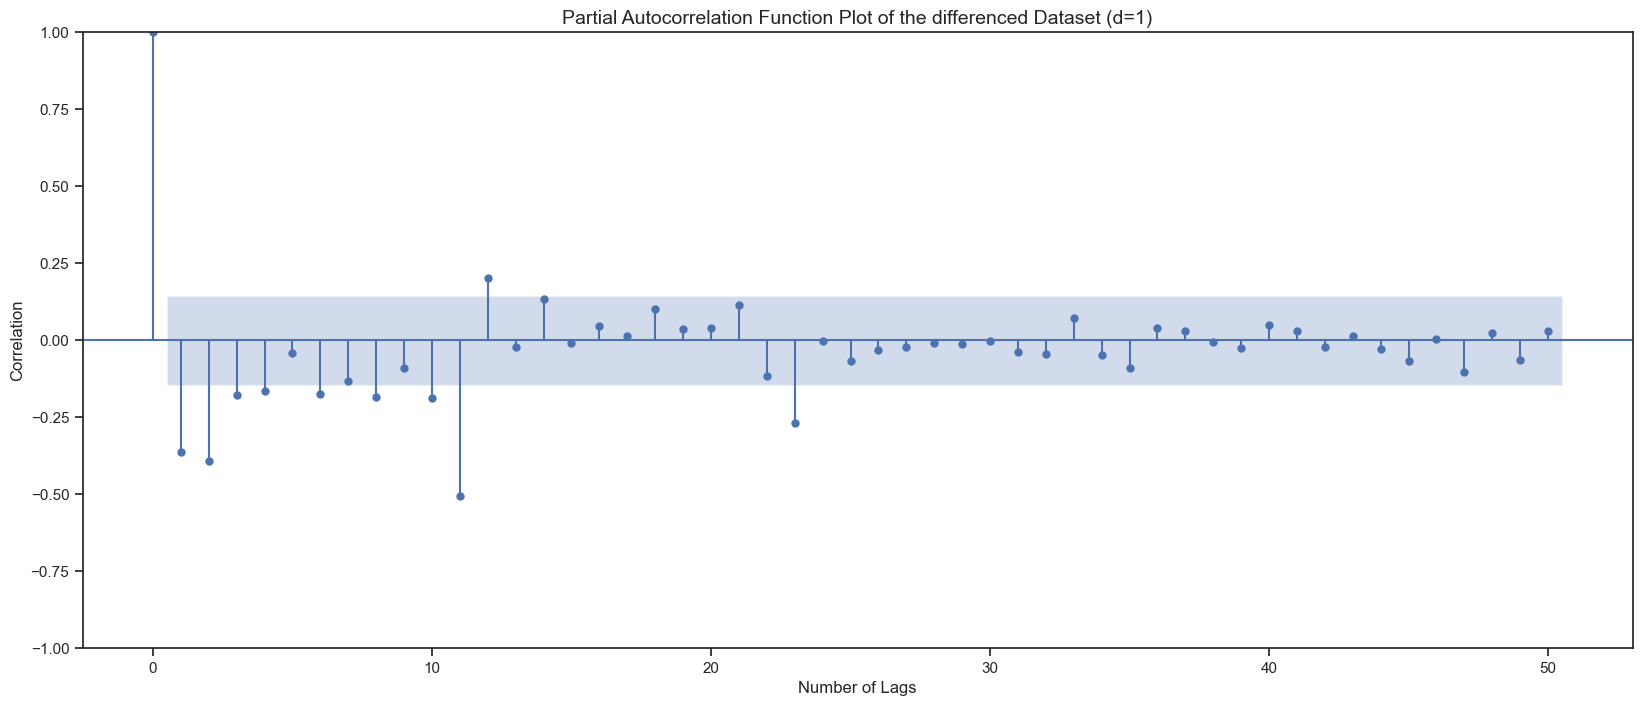

In [48]:
plot_pacf(df.diff().dropna(),alpha=0.05,lags=50);
plt.title('Partial Autocorrelation Function Plot of the differenced Dataset (d=1)', fontsize=14)
plt.xlabel('Number of Lags')
plt.ylabel('Correlation')

ARIMA Model

In [49]:
train = df[df.index.year < 1991]
test = df[df.index.year >= 1991]

In [50]:
from IPython.display import display

In [51]:
print('First few rows of Training Data')
display(train.head(10))
print('Last few rows of Training Data')
display(train.tail(10))

First few rows of Training Data


,Rose_Wine_Sales
Time_Stamp,
1980-01-31,112.0
1980-02-29,118.0
1980-03-31,129.0
1980-04-30,99.0
1980-05-31,116.0
1980-06-30,168.0
1980-07-31,118.0
1980-08-31,129.0
1980-09-30,205.0


Last few rows of Training Data


,Rose_Wine_Sales
Time_Stamp,
1990-03-31,73.0
1990-04-30,77.0
1990-05-31,69.0
1990-06-30,76.0
1990-07-31,78.0
1990-08-31,70.0
1990-09-30,83.0
1990-10-31,65.0
1990-11-30,110.0


In [52]:
print('-------------------------------------')
print('Number of observations in Train data   :  ',train.shape)
print('Number of observations in Test data    :  ',test.shape)
print('Total Observations                     :  ',test.shape[0]+train.shape[0])
print('-------------------------------------')

-------------------------------------
Number of observations in Train data   :   (132, 1)
Number of observations in Test data    :   (55, 1)
Total Observations                     :   187
-------------------------------------


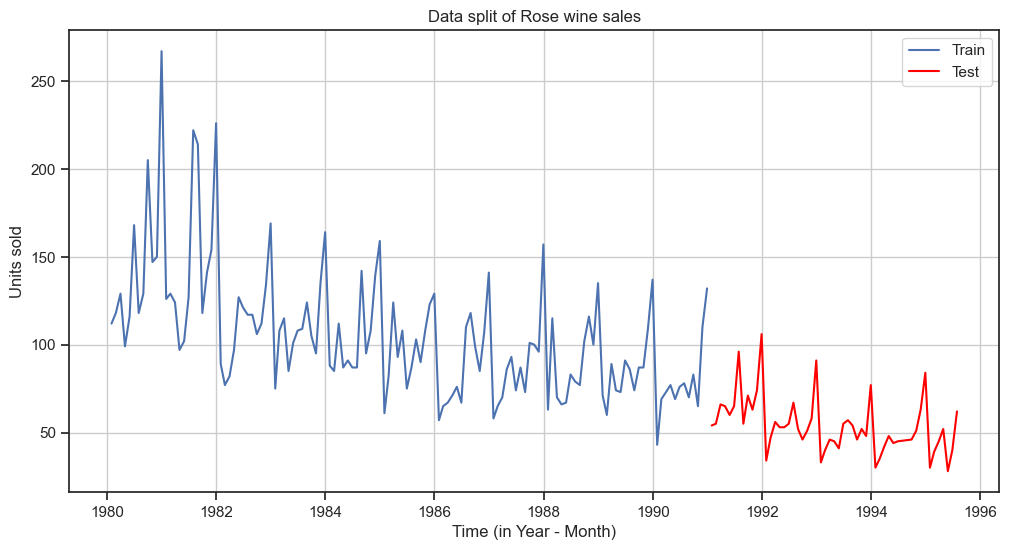

In [53]:
plt.figure(figsize = (12, 6))
plt.plot(train['Rose_Wine_Sales'], label = 'Train')
plt.plot(test['Rose_Wine_Sales'], label = 'Test', color='Red')
plt.legend(loc='best')
plt.xlabel('Time (in Year - Month)')
plt.ylabel('Units sold')
plt.title('Data split of Rose wine sales', fontsize = 12)
plt.show;
plt.grid();

In [54]:
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


Manual ARIMA Model


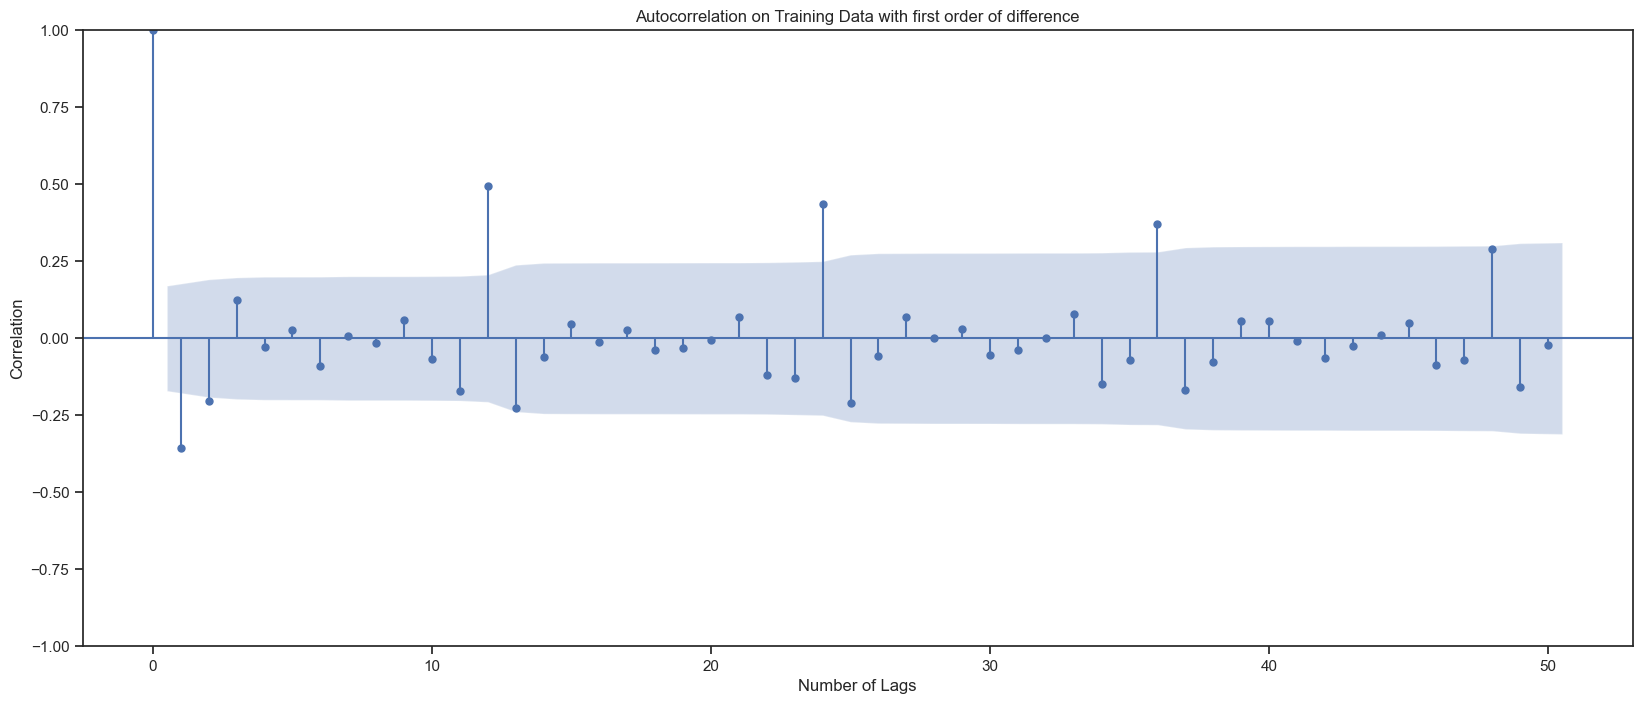

In [55]:
plot_acf(train.diff(),title='Autocorrelation on Training Data with first order of difference',missing='drop',lags=50)
plt.xlabel('Number of Lags')
plt.ylabel('Correlation')
plt.show()

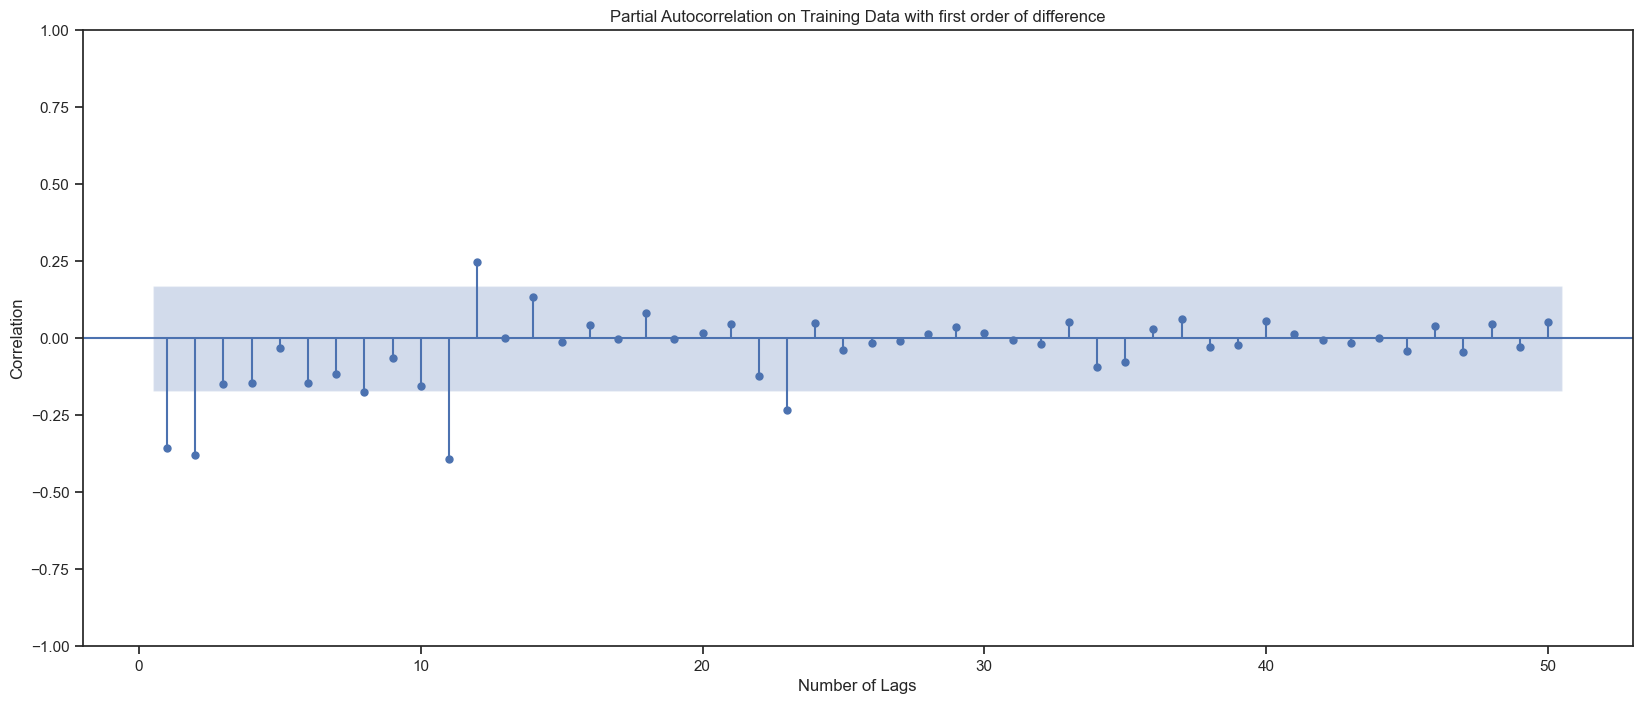

In [56]:
plot_pacf(train.diff().dropna(),title='Partial Autocorrelation on Training Data with first order of difference',lags=50,zero=False,method='ywmle')
plt.xlabel('Number of Lags')
plt.ylabel('Correlation')
plt.show()

Here, we have taken alpha=0.05.

The Auto-Regressive parameter in an ARIMA model is 'p' which comes from the significant lag after which the PACF plot cuts-off to 0.
The Moving-Average parameter in an ARIMA model is 'q' which comes from the significant lag after which the ACF plot cuts-off to 0.
By looking at the above plots, we will take the value of p and q to be 2 and 2 respectively.

In [60]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA


manual_ARIMA = ARIMA(train['Rose_Wine_Sales'], order=(2,1,2), freq='M')
results_manual_ARIMA = manual_ARIMA.fit()
print(results_manual_ARIMA.summary())


                               SARIMAX Results                                
Dep. Variable:        Rose_Wine_Sales   No. Observations:                  132
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -635.935
Date:                Thu, 01 Aug 2024   AIC                           1281.871
Time:                        21:01:53   BIC                           1296.247
Sample:                    01-31-1980   HQIC                          1287.712
                         - 12-31-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4540      0.469     -0.969      0.333      -1.372       0.464
ar.L2          0.0001      0.170      0.001      0.999      -0.334       0.334
ma.L1         -0.2541      0.459     -0.554      0.5

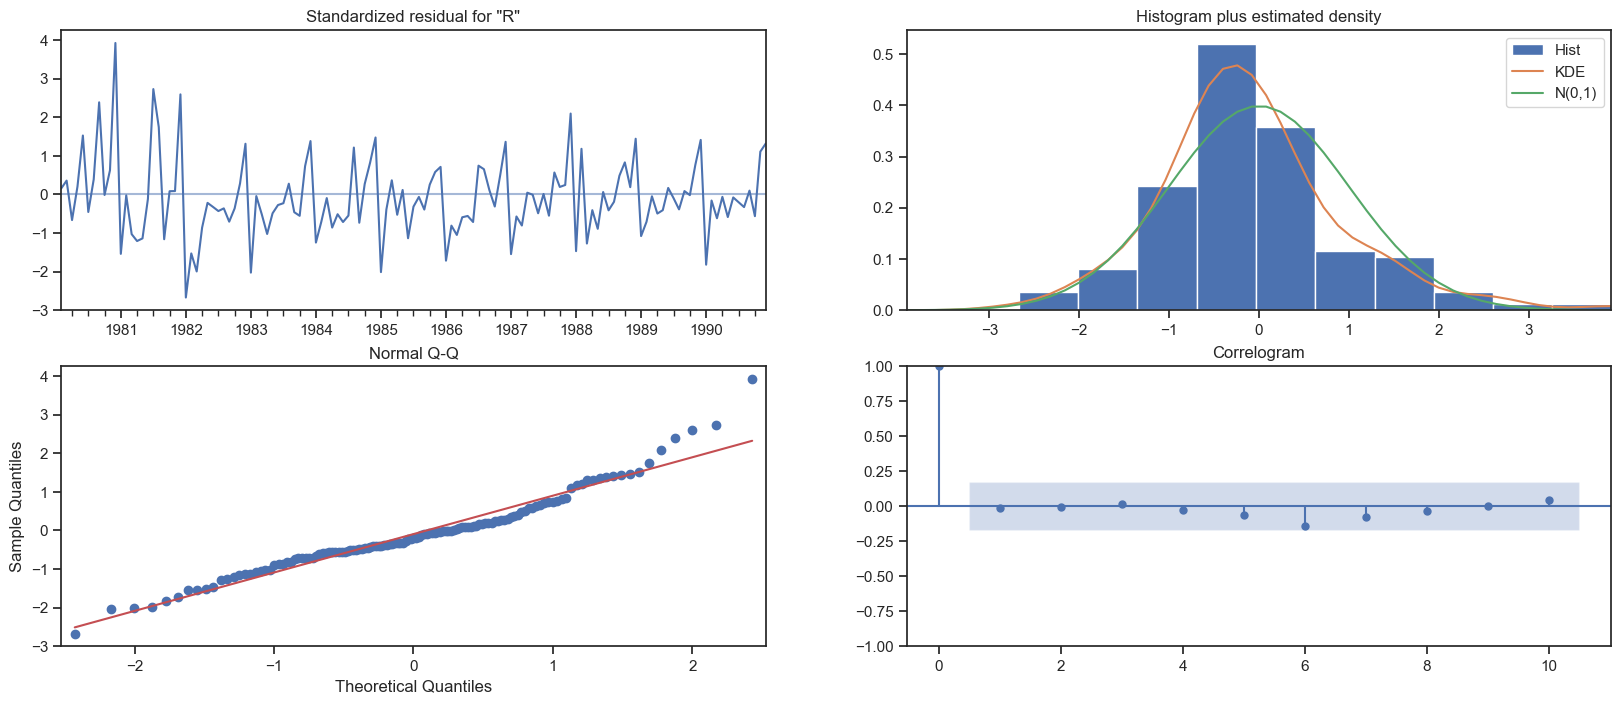

In [61]:
results_manual_ARIMA.plot_diagnostics();

Predict on the Test Set using this model and evaluate the model.

In [62]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))

In [63]:
predicted_manual_ARIMA

1991-01-31    91.159512
1991-02-28    85.314628
1991-03-31    87.962468
1991-04-30    86.759563
1991-05-31    87.306038
1991-06-30    87.057777
1991-07-31    87.170561
1991-08-31    87.119324
1991-09-30    87.142601
1991-10-31    87.132026
1991-11-30    87.136830
1991-12-31    87.134648
1992-01-31    87.135639
1992-02-29    87.135189
1992-03-31    87.135393
1992-04-30    87.135300
1992-05-31    87.135342
1992-06-30    87.135323
1992-07-31    87.135332
1992-08-31    87.135328
1992-09-30    87.135330
1992-10-31    87.135329
1992-11-30    87.135329
1992-12-31    87.135329
1993-01-31    87.135329
1993-02-28    87.135329
1993-03-31    87.135329
1993-04-30    87.135329
1993-05-31    87.135329
1993-06-30    87.135329
1993-07-31    87.135329
1993-08-31    87.135329
1993-09-30    87.135329
1993-10-31    87.135329
1993-11-30    87.135329
1993-12-31    87.135329
1994-01-31    87.135329
1994-02-28    87.135329
1994-03-31    87.135329
1994-04-30    87.135329
1994-05-31    87.135329
1994-06-30    87

Text(0, 0.5, 'Wine Units Sold')

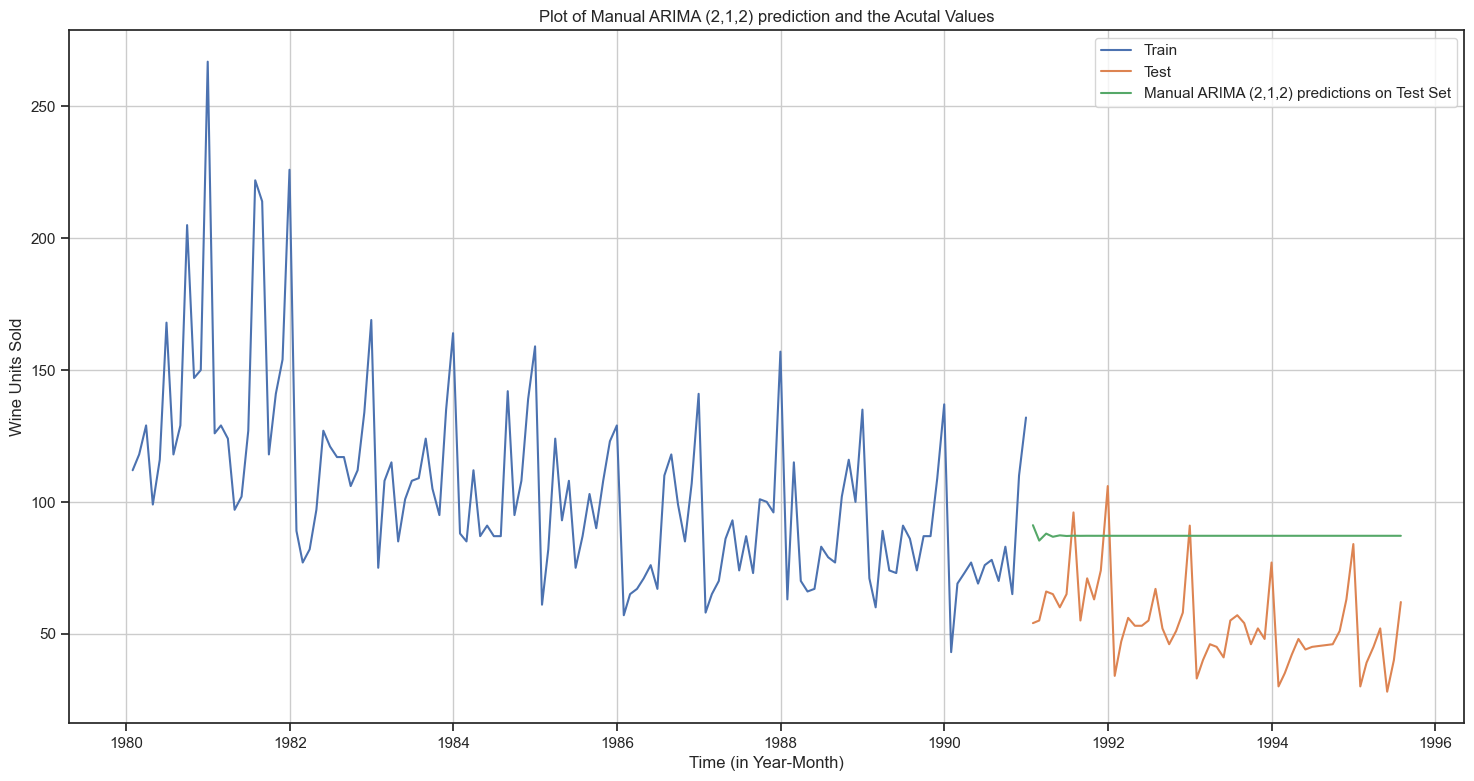

In [64]:
plt.figure(figsize=(18,9))
plt.plot(train['Rose_Wine_Sales'], label='Train')
plt.plot(test['Rose_Wine_Sales'], label='Test')

plt.plot(predicted_manual_ARIMA, label='Manual ARIMA (2,1,2) predictions on Test Set')

plt.legend(loc='best')
plt.grid();
plt.title('Plot of Manual ARIMA (2,1,2) prediction and the Acutal Values');
plt.xlabel('Time (in Year-Month)')
plt.ylabel('Wine Units Sold')

In [68]:
from sklearn.metrics import mean_squared_error


def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(test['Rose_Wine_Sales'], predicted_manual_ARIMA, squared=False)
mape = mean_absolute_percentage_error(test['Rose_Wine_Sales'], predicted_manual_ARIMA)

print('RMSE:', rmse)
print('MAPE:', mape)


RMSE: 36.870991042405436
MAPE: 76.0554456408753


Manual SARIMA Model

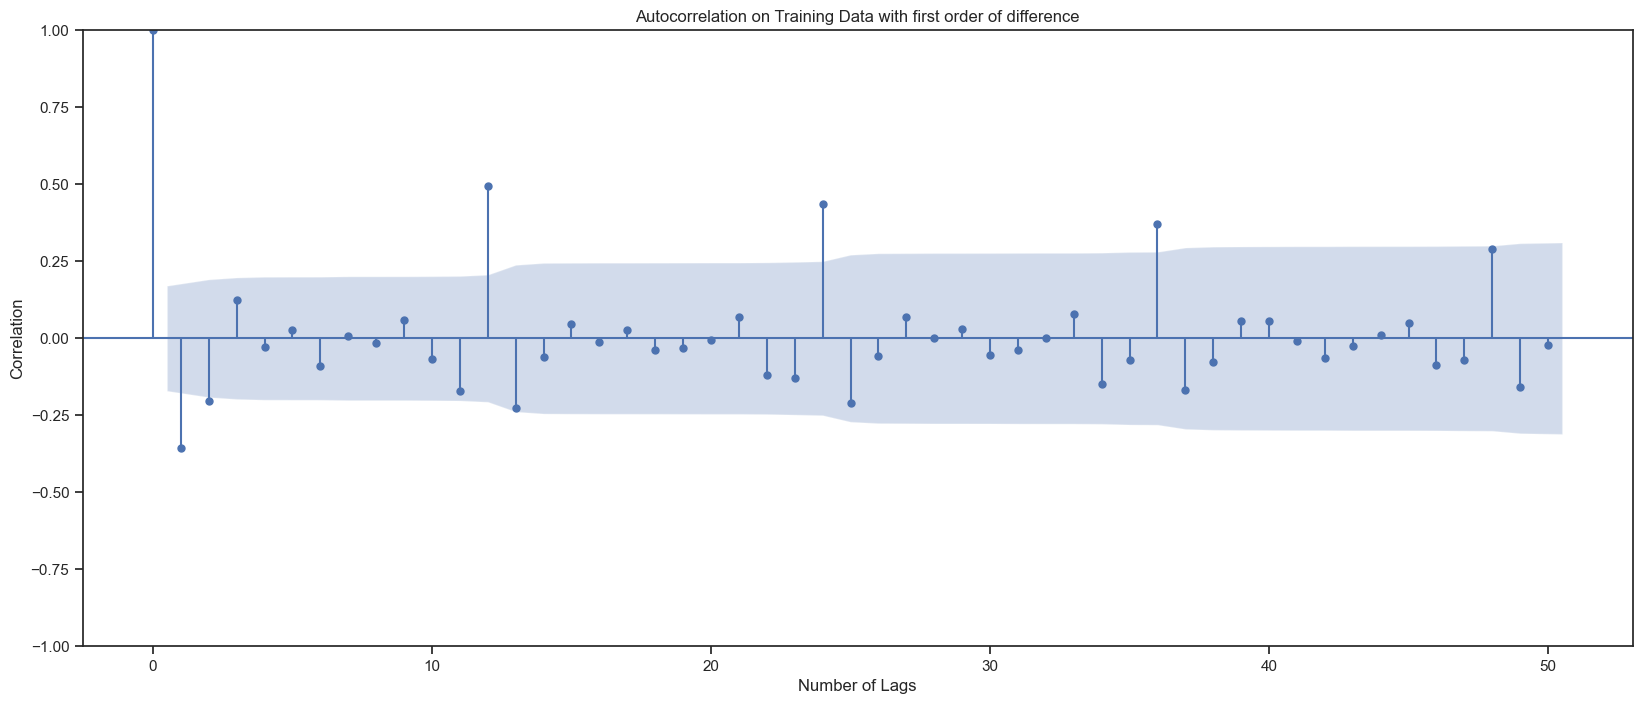

In [70]:
plot_acf(train.diff(),title='Autocorrelation on Training Data with first order of difference',missing='drop',lags=50)
plt.xlabel('Number of Lags')
plt.ylabel('Correlation')
plt.show()

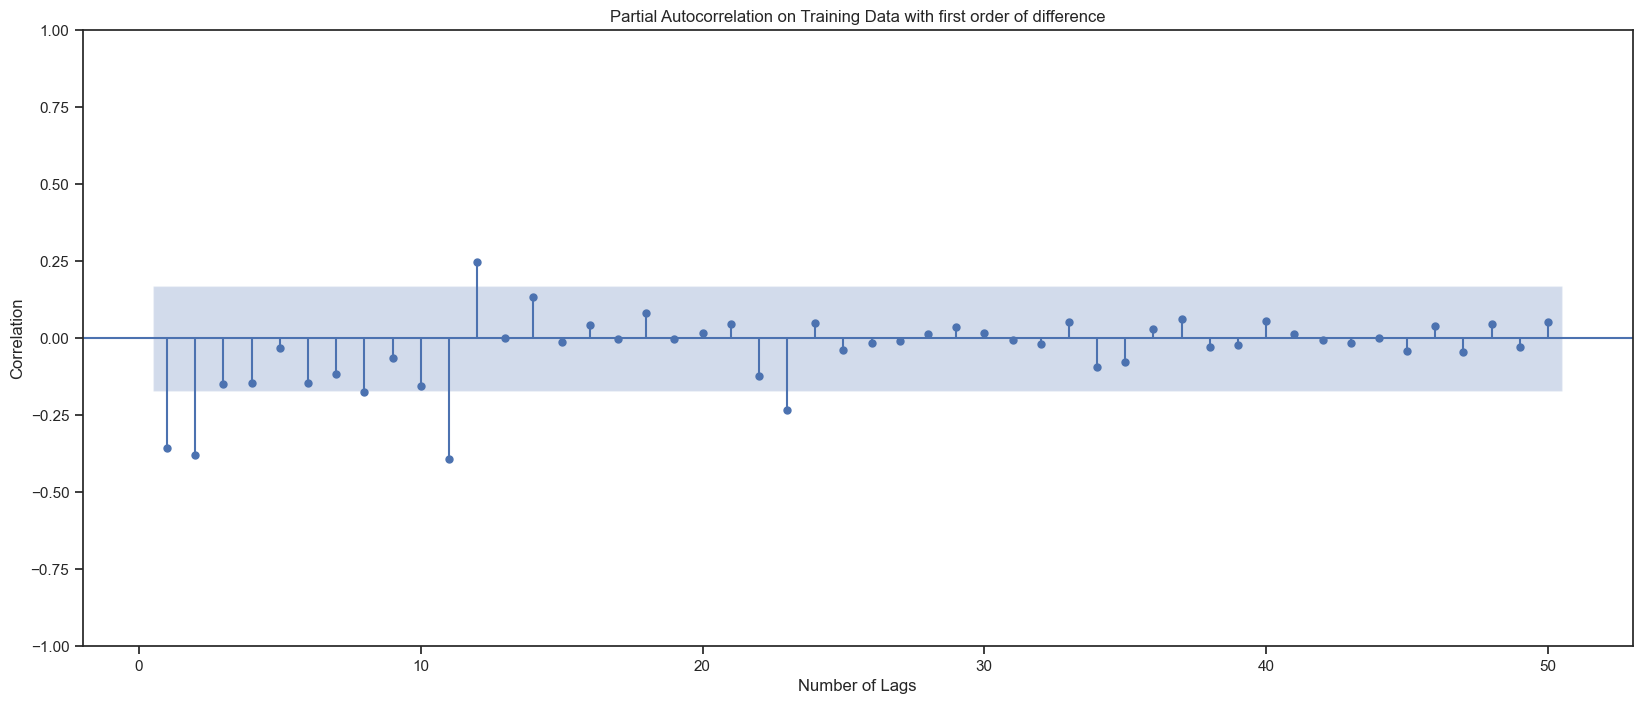

In [71]:
plot_pacf(train.diff().dropna(),title='Partial Autocorrelation on Training Data with first order of difference',lags=50,zero=False,method='ywmle')
plt.xlabel('Number of Lags')
plt.ylabel('Correlation')
plt.show()

Manual SARIMA Model

ACF plot

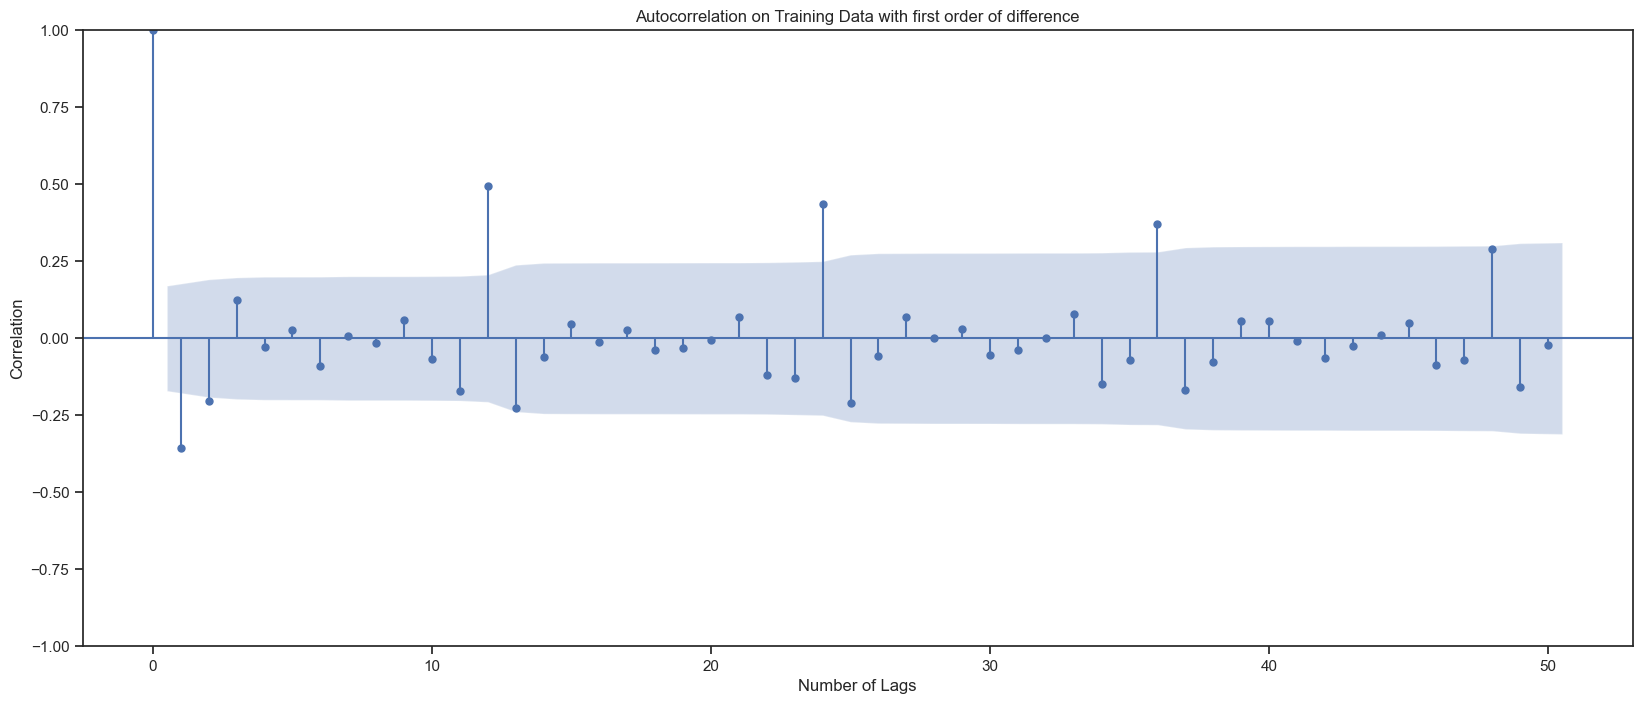

In [72]:
plot_acf(train.diff(),title='Autocorrelation on Training Data with first order of difference',missing='drop',lags=50)
plt.xlabel('Number of Lags')
plt.ylabel('Correlation')
plt.show()

PACF plot

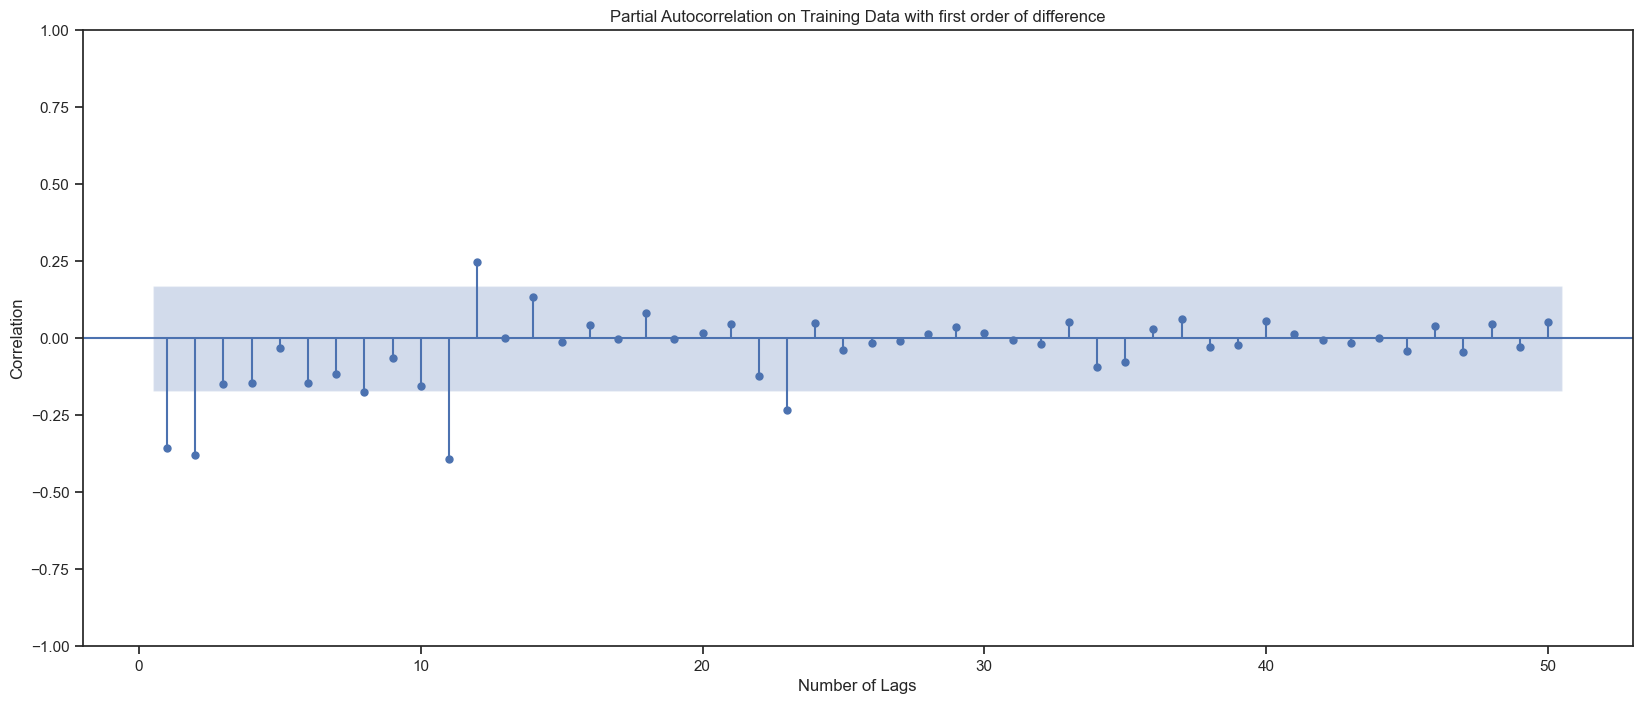

In [73]:
plot_pacf(train.diff().dropna(),title='Partial Autocorrelation on Training Data with first order of difference',lags=50,zero=False,method='ywmle')
plt.xlabel('Number of Lags')
plt.ylabel('Correlation')
plt.show()

We see that our ACF plot at the seasonal interval (12) does not taper off quickly. So, we go ahead and take a seasonal differencing of the original series. Before that let us look at the original series.

Text(0, 0.5, 'Units Sold')

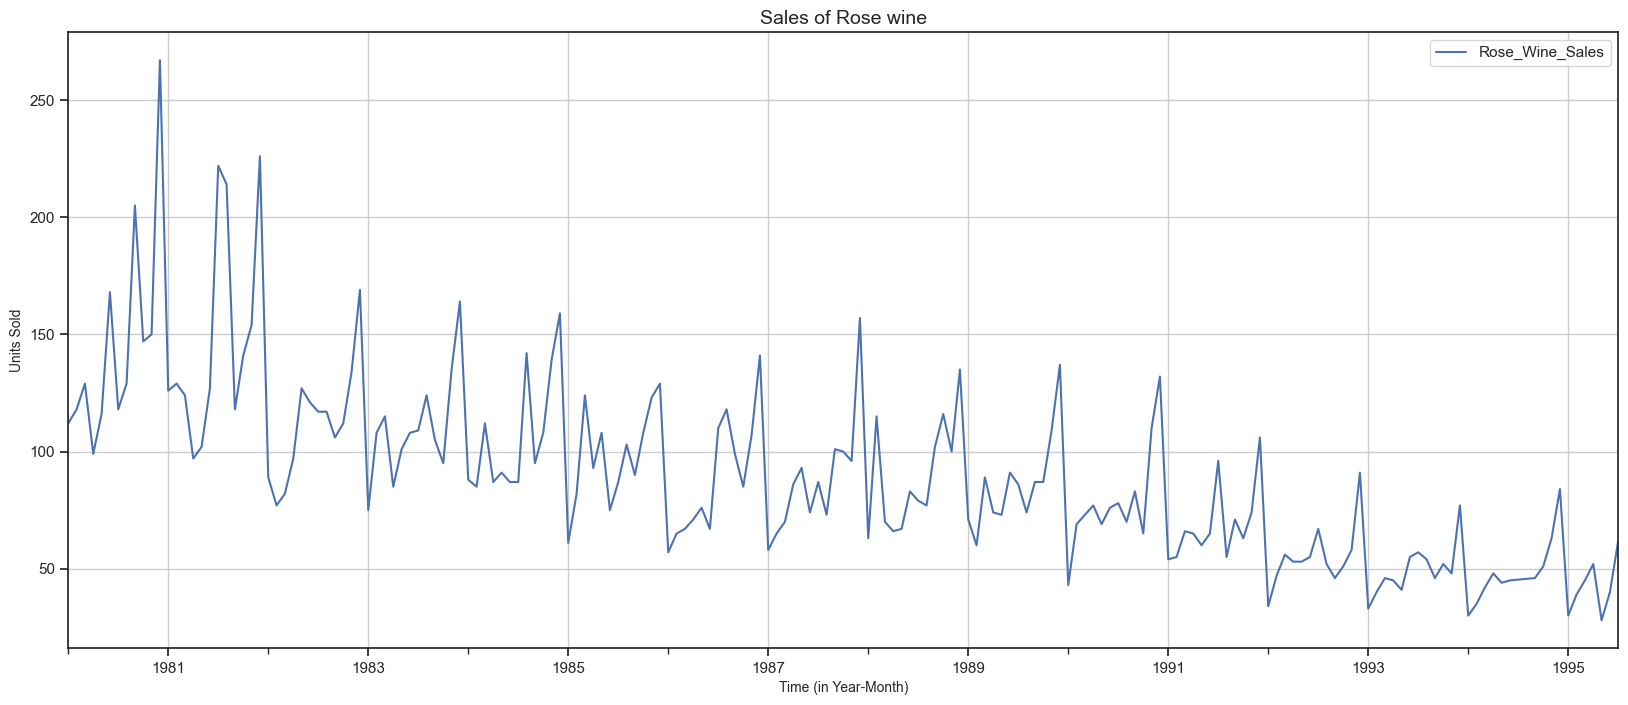

In [74]:
rcParams['figure.figsize'] = 20,8
df.plot(grid=True);
plt.title('Sales of Rose wine', fontsize=14)
plt.xlabel('Time (in Year-Month)',fontsize=10)
plt.ylabel('Units Sold',fontsize=10)

Text(0, 0.5, 'Wine Units Sold')

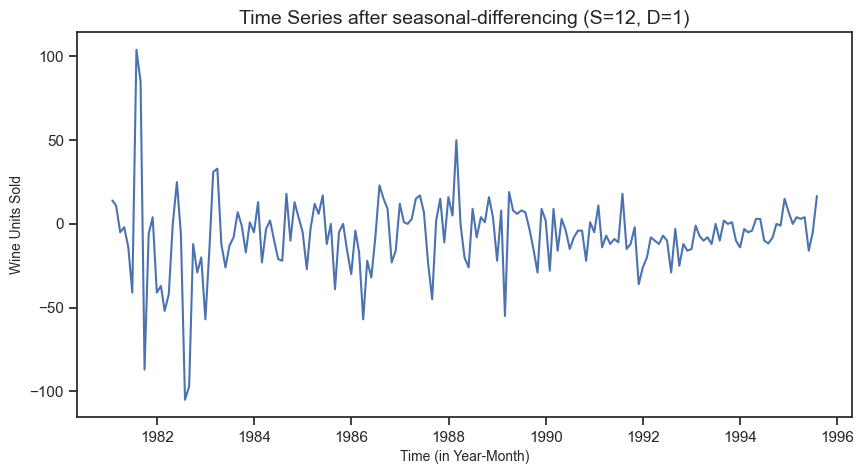

In [75]:
plt.figure(figsize=(10,5))
plt.plot(df['Rose_Wine_Sales'].diff(12).dropna())
plt.title ('Time Series after seasonal-differencing (S=12, D=1)',fontsize=14);
plt.xlabel('Time (in Year-Month)',fontsize=10)
plt.ylabel('Wine Units Sold',fontsize=10)

Text(0, 0.5, 'Wine Units Sold')

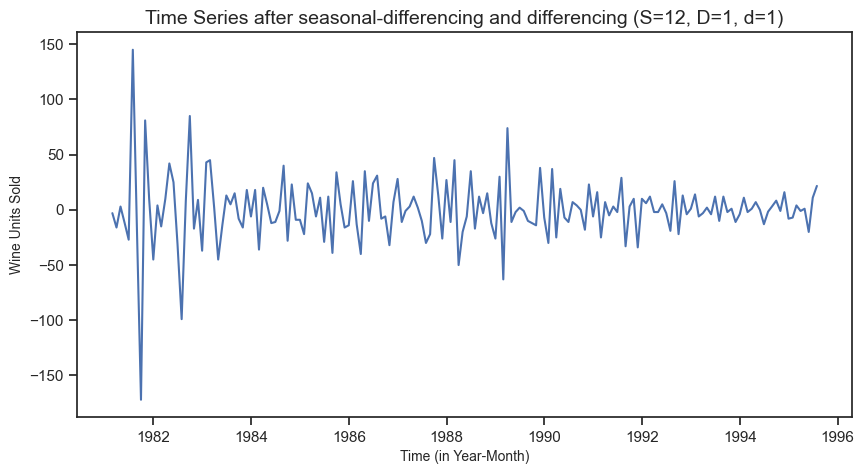

In [76]:
plt.figure(figsize=(10,5))
plt.plot((df['Rose_Wine_Sales'].diff(12).dropna()).diff().dropna())
plt.title ('Time Series after seasonal-differencing and differencing (S=12, D=1, d=1)',fontsize=14);
plt.xlabel('Time (in Year-Month)',fontsize=10)
plt.ylabel('Wine Units Sold',fontsize=10)

In [77]:
dftest = adfuller((df['Rose_Wine_Sales'].diff(12).dropna()).diff().dropna(),regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -4.551
DF test p-value is 0.0012457307793128736
Number of lags used 11


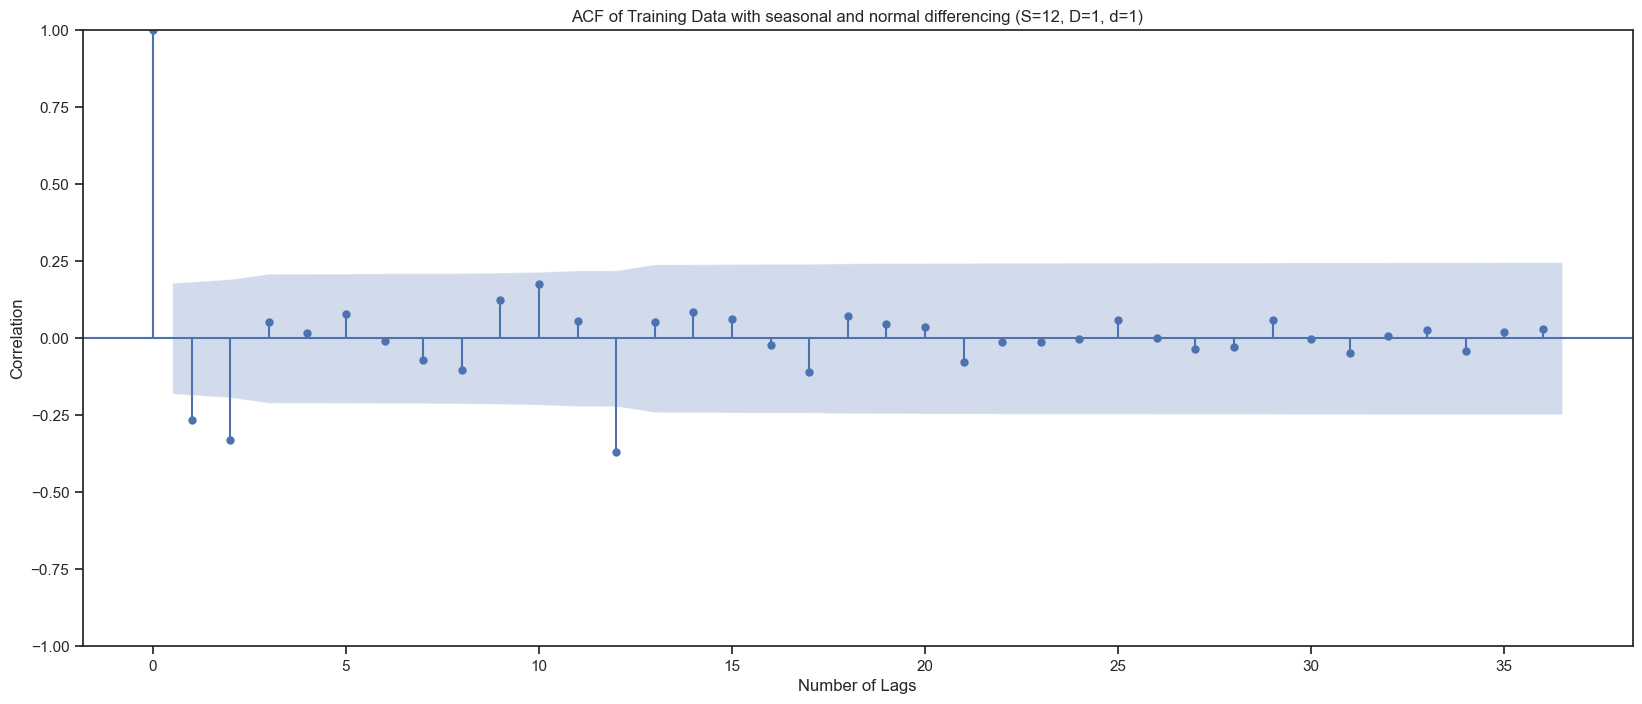

In [78]:
plot_acf((train['Rose_Wine_Sales'].diff(12).dropna()).diff().dropna(),title='ACF of Training Data with seasonal and normal differencing (S=12, D=1, d=1)',lags=36)
plt.xlabel('Number of Lags')
plt.ylabel('Correlation')
plt.show()

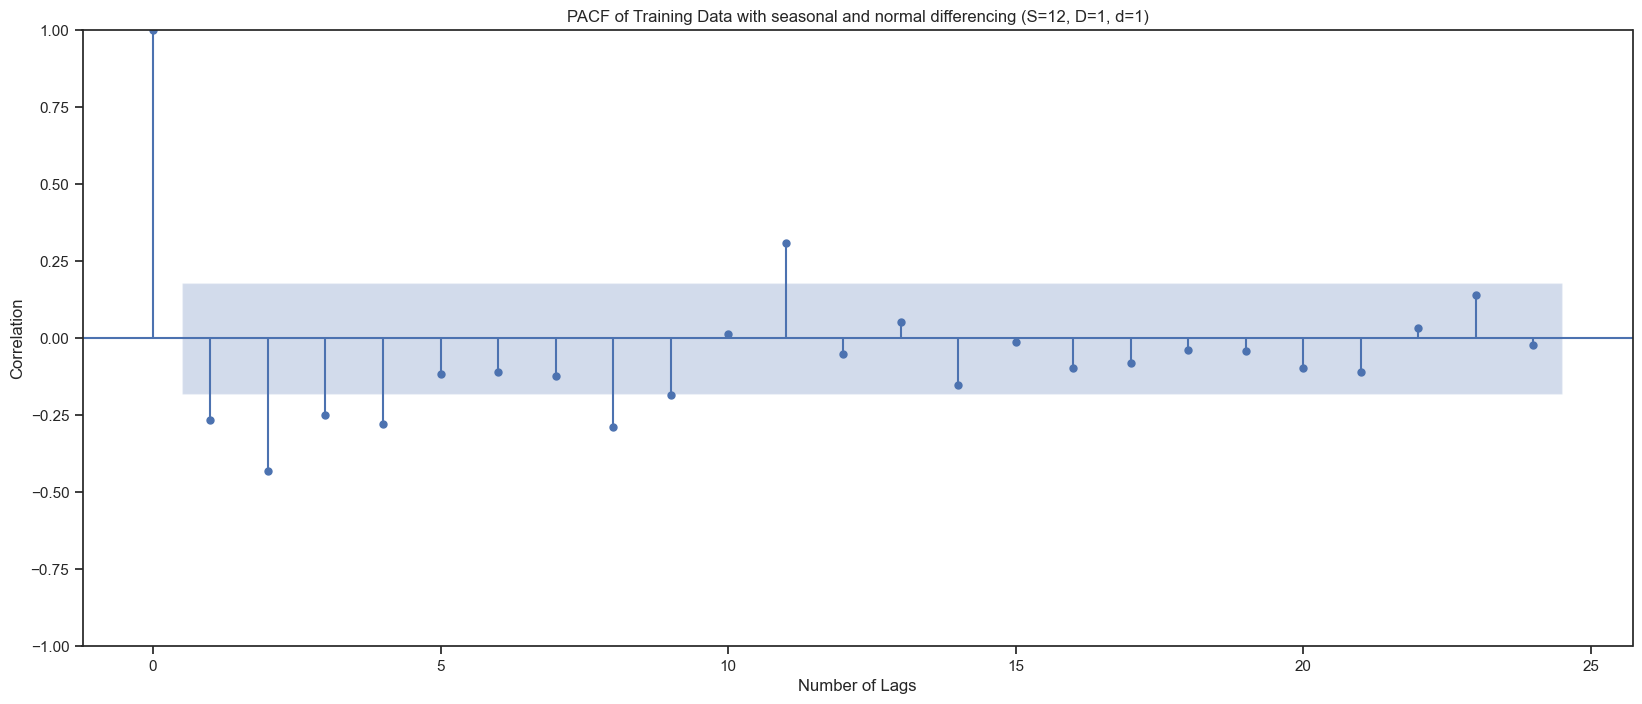

In [79]:
plot_pacf((train['Rose_Wine_Sales'].diff(12).dropna()).diff().dropna(),title='PACF of Training Data with seasonal and normal differencing (S=12, D=1, d=1)',lags=24)
plt.xlabel('Number of Lags')
plt.ylabel('Correlation')
plt.show()

Here we have taken alpha = 0.05 and seasonal period as 12.

From the PACF plot it can be seen that till lag 4 is significant before cut-off, so AR term ‘p = 4’ is chosen. At seasonal lag of 12, it cuts off, so keep seasonal AR ‘P = 0’.

From ACF plot, lag 1 and 2 are significant before it cuts off, so lets keep MA term ‘q = 2’ and at seasonal lag of 12, a significant lag is apparent and no seaonal lags are apparent at lags 24, 36 or afterwards, so lets keep ‘Q = 1'.

The final selected terms for SARIMA model is (4, 1, 2)x(0, 1, 1, 12), as inferred from the ACF and PACF plots.

In [80]:
import statsmodels.api as sm

manual_SARIMA = sm.tsa.statespace.SARIMAX(train['Rose_Wine_Sales'],
                                order=(4,1,2),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA = manual_SARIMA.fit(maxiter=1000)
print(results_manual_SARIMA.summary())

                                      SARIMAX Results                                       
Dep. Variable:                      Rose_Wine_Sales   No. Observations:                  132
Model:             SARIMAX(4, 1, 2)x(0, 1, [1], 12)   Log Likelihood                -446.102
Date:                              Sun, 04 Aug 2024   AIC                            908.203
Time:                                      01:17:47   BIC                            929.358
Sample:                                  01-31-1980   HQIC                           916.774
                                       - 12-31-1990                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8046      0.119     -6.778      0.000      -1.037      -0.572
ar.L2          0.03

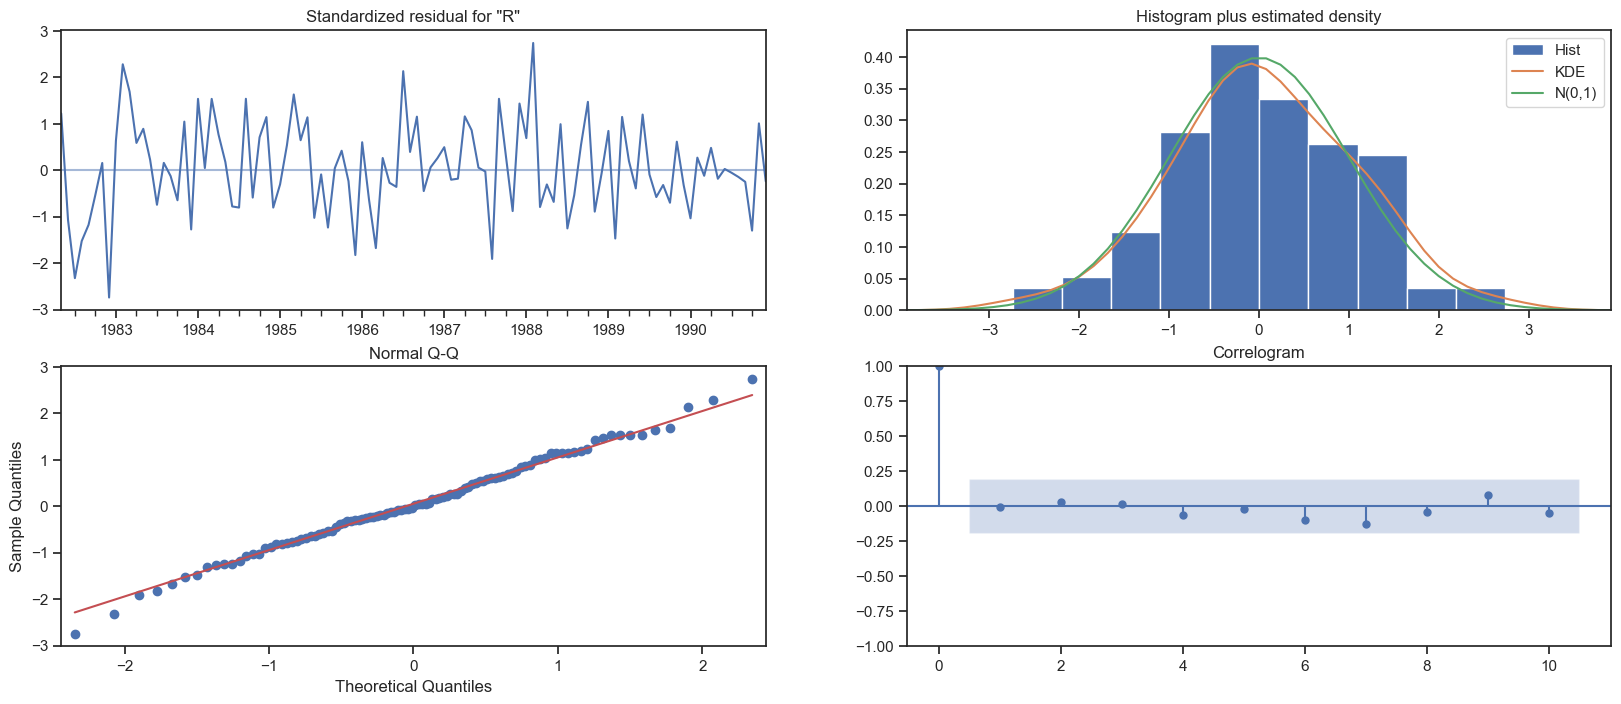

In [81]:
results_manual_SARIMA.plot_diagnostics()
plt.show()

Predict on the Test Set using this model and evaluate the model.

In [82]:
predicted_manual_SARIMA = results_manual_SARIMA.get_forecast(steps=len(test))

In [83]:
predicted_manual_SARIMA.predicted_mean

1991-01-31     47.471840
1991-02-28     63.350015
1991-03-31     65.513283
1991-04-30     67.317234
1991-05-31     61.756382
1991-06-30     72.816686
1991-07-31     71.513809
1991-08-31     67.808605
1991-09-30     77.918563
1991-10-31     73.748611
1991-11-30     97.305524
1991-12-31    127.634761
1992-01-31     41.226589
1992-02-29     59.413098
1992-03-31     61.742032
1992-04-30     62.374953
1992-05-31     57.582062
1992-06-30     67.508087
1992-07-31     67.387065
1992-08-31     62.729089
1992-09-30     73.769496
1992-10-31     68.753613
1992-11-30     93.025757
1992-12-31    122.710418
1993-01-31     36.869571
1993-02-28     54.567995
1993-03-31     57.326443
1993-04-30     57.584647
1993-05-31     53.116292
1993-06-30     62.758956
1993-07-31     62.884543
1993-08-31     58.012443
1993-09-30     69.239308
1993-10-31     64.061257
1993-11-30     88.474338
1993-12-31    118.036385
1994-01-31     32.302162
1994-02-28     49.907889
1994-03-31     52.746955
1994-04-30     52.935058


Text(0, 0.5, 'Wine Units Sold')

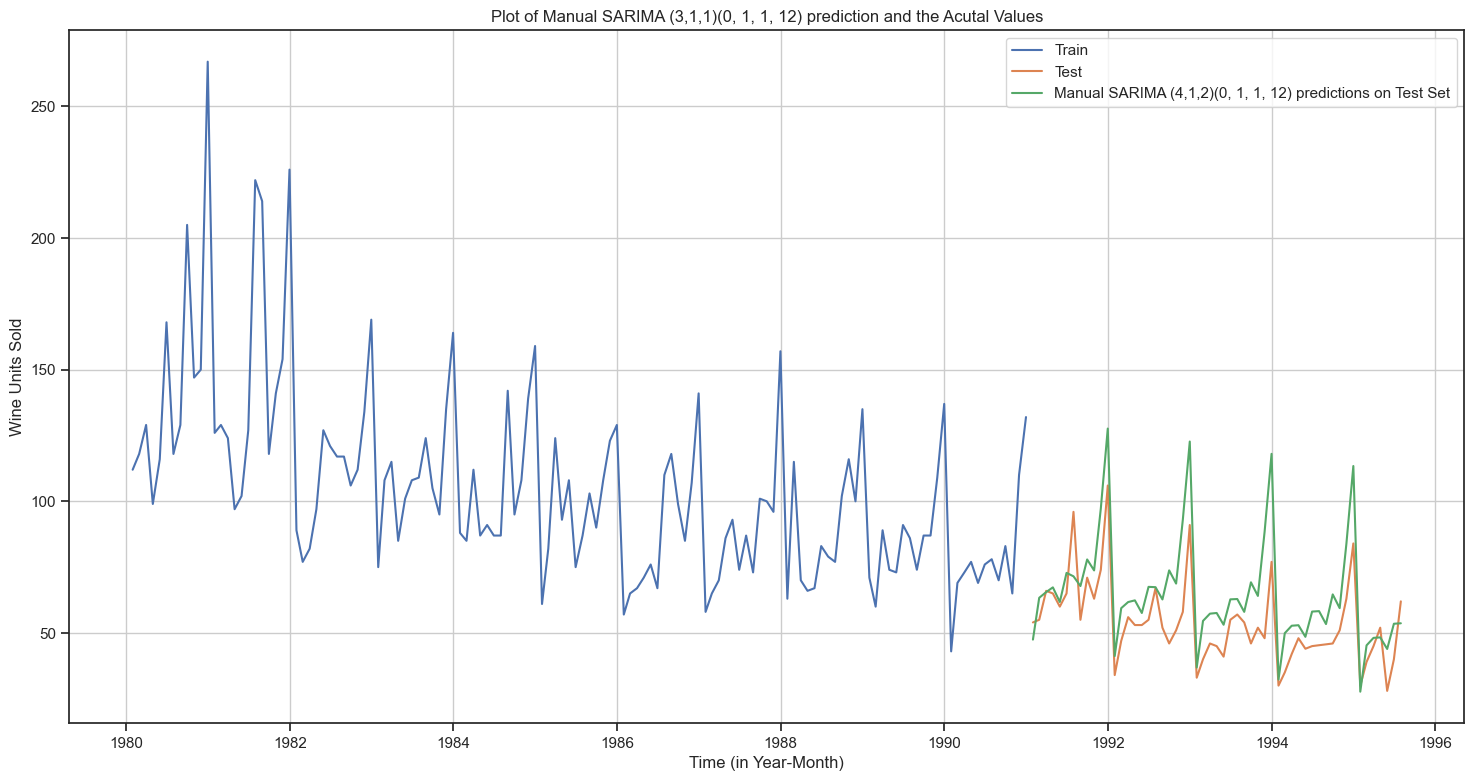

In [84]:
plt.figure(figsize=(18,9))
plt.plot(train['Rose_Wine_Sales'], label='Train')
plt.plot(test['Rose_Wine_Sales'], label='Test')

plt.plot(predicted_manual_SARIMA.predicted_mean, label='Manual SARIMA (4,1,2)(0, 1, 1, 12) predictions on Test Set')

plt.legend(loc='best')
plt.grid();
plt.title('Plot of Manual SARIMA (3,1,1)(0, 1, 1, 12) prediction and the Acutal Values');
plt.xlabel('Time (in Year-Month)')
plt.ylabel('Wine Units Sold')

In [85]:
rmse = mean_squared_error(test['Rose_Wine_Sales'],predicted_manual_SARIMA.predicted_mean,squared=False)
mape = mean_absolute_percentage_error(test['Rose_Wine_Sales'],predicted_manual_SARIMA.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 15.907184552758682 
MAPE: 23.712609374789267
